In [ ]:
import os
os.listdir('./rawdata_superstore')

['Superstore.csv']

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

!pip install koreanize-matplotlib
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 14.4 MB/s eta 0:00:00


# **데이터 불러오기**

In [ ]:
# 데이터 불러오기
import pandas as pd

sales = pd.read_csv('./rawdata_superstore/Superstore.csv', encoding='latin1')

In [ ]:
# 컬럼 속성 및 결측치 확인
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
# 판다스 데이터프레임 모든 열 보이게 옵션 변경
pd.set_option('display.max_columns', None)

In [ ]:
sales.loc[:3]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310


# **products 관련 EDA**
- 카테고리(총 3개)
    - Furniture, Office Supplies, Technology
- 카테고리 별 세부 카테고리(총 17개)
    - Furniture (4개)
        - Bookcases, Chairs, Tables, Furnishings
    - Office Supplies (9개)
        - Labels, Storage, Art, Binders, Appliances, Paper, Envelopes, Fasteners, Supplies
    - Technology (4개)
        - Phones, Accessories, Machines, Copiers

In [ ]:
# 총 3개의 카테고리 : Furniture, Office Supplies, Technology
sales['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [ ]:
# 총 17개의 subcategory
sales['Sub-Category'].nunique()

17

In [ ]:
# 17개의 subcategory
sales['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [ ]:
# Category가 Furniture인 경우의 Sub-Category 확인
sales[sales['Category'] == 'Furniture']['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Tables', 'Furnishings'], dtype=object)

In [ ]:
# Category가 Office Supplies인 경우의 Sub-Category 확인
sales[sales['Category'] == 'Office Supplies']['Sub-Category'].unique()

array(['Labels', 'Storage', 'Art', 'Binders', 'Appliances', 'Paper',
       'Envelopes', 'Fasteners', 'Supplies'], dtype=object)

In [ ]:
# Category가 Technology인 경우의 Sub-Category 확인
sales[sales['Category'] == 'Technology']['Sub-Category'].unique()

array(['Phones', 'Accessories', 'Machines', 'Copiers'], dtype=object)

In [ ]:
sales.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


## 카테고리 별 판매건수

In [ ]:
# 상품 카테고리/상품명 별 개수(value_counts() 사용)
sales[['Category']].value_counts()

,count
Category,
Office Supplies,6026
Furniture,2121
Technology,1847


In [ ]:
# 상품 카테고리/상품명 별 개수(value_counts() 사용)
sales[['Category']].value_counts(normalize=True)

,proportion
Category,
Office Supplies,0.602962
Furniture,0.212227
Technology,0.184811


In [ ]:
sales[['Category']].value_counts().round(2).tolist()

[6026, 2121, 1847]

In [ ]:
sales[['Category']].value_counts(normalize=True).round(2).tolist()

[0.6, 0.21, 0.18]

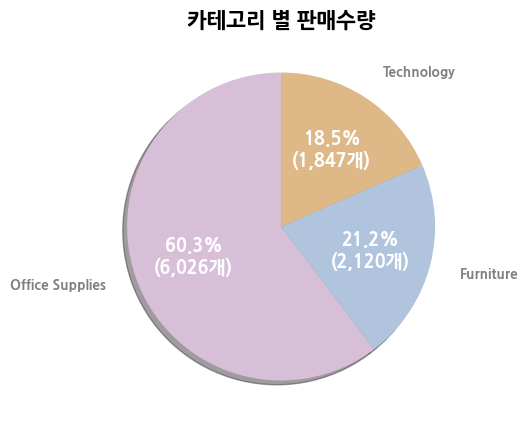

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Custom function to display percentage and count with thousands separator
def func(pct, allvals):
    absolute = int(pct / 100. * np.sum(allvals))
    return "{:.1f}%\n({:,}개)".format(pct, absolute)  # Add thousands separator to the count

# Pie chart data
labels = ['Office Supplies', 'Furniture', 'Technology']
sizes = [6026, 2121, 1847]
explode = (0, 0, 0)

# Define gradient gray colors (dark to light)
colors = ['thistle', 'lightsteelblue', 'burlywood']

# Set the figure size to medium
plt.figure(figsize=(5, 5))  # Medium-sized figure

# Create the pie chart
patches, texts, autotexts = plt.pie(sizes,
                                    explode=explode,
                                    labels=labels,
                                    autopct=lambda pct: func(pct, sizes),
                                    shadow=True,
                                    startangle=90,
                                    colors=colors,
                                    labeldistance=1.2)

plt.title('카테고리 별 판매수량', fontsize=15, weight='bold')

# Style the label texts
for t in texts:
    t.set_fontsize(10)
    t.set_color('gray')
    t.set_weight('bold')

# Style the autotexts (percentage and count inside pie chart)
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(13)
    t.set_weight('bold')

plt.show()


## 카테고리 별 총 판매수량

In [ ]:
# 상품 카테고리/상품명 별 개수(value_counts() 사용)
sales.groupby(['Category'])['Quantity'].sum()

,Quantity
Category,
Furniture,8028
Office Supplies,22906
Technology,6939


In [ ]:
sales.groupby(['Category'])['Quantity'].sum().tolist()

[8028, 22906, 6939]

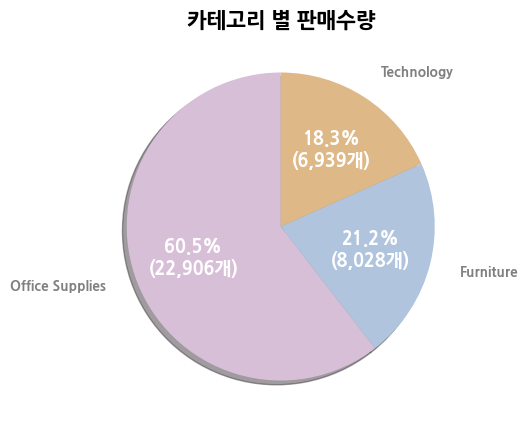

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Custom function to display percentage and count with thousands separator
def func(pct, allvals):
    absolute = int(pct / 100. * np.sum(allvals))
    return "{:.1f}%\n({:,}개)".format(pct, absolute)  # Add thousands separator to the count

# Pie chart data
labels = ['Office Supplies', 'Furniture', 'Technology']
sizes = [22906, 8028, 6939]
explode = (0, 0, 0)

# Define gradient gray colors (dark to light)
colors = ['thistle', 'lightsteelblue', 'burlywood']

# Set the figure size to medium
plt.figure(figsize=(5, 5))  # Medium-sized figure

# Create the pie chart
patches, texts, autotexts = plt.pie(sizes,
                                    explode=explode,
                                    labels=labels,
                                    autopct=lambda pct: func(pct, sizes),
                                    shadow=True,
                                    startangle=90,
                                    colors=colors,
                                    labeldistance=1.2)

plt.title('카테고리 별 판매수량', fontsize=15, weight='bold')

# Style the label texts
for t in texts:
    t.set_fontsize(10)
    t.set_color('gray')
    t.set_weight('bold')

# Style the autotexts (percentage and count inside pie chart)
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(13)
    t.set_weight('bold')

plt.show()


In [ ]:
sales.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


# 카테고리 별 매출

In [ ]:
# 상품 카테고리/상품명 별 개수(value_counts() 사용)
sales.groupby(['Category'])['Sales'].sum()

,Sales
Category,
Furniture,741999.7953
Office Supplies,719047.0320
Technology,836154.0330


In [ ]:
sales.groupby(['Category'])['Sales'].sum().tolist()

[741999.7953, 719047.032, 836154.033]

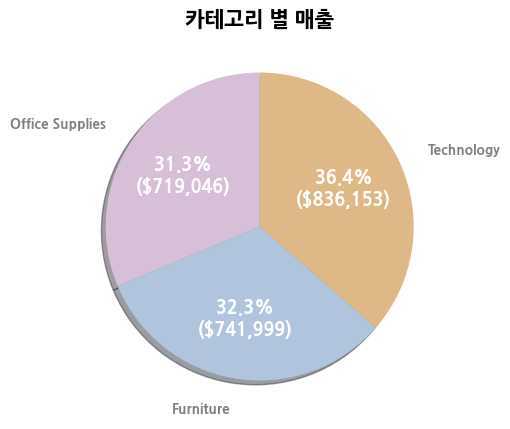

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Custom function to display percentage and count with thousands separator
def func(pct, allvals):
    absolute = int(pct / 100. * np.sum(allvals))
    return "{:.1f}%\n(${:,})".format(pct, absolute)  # Add thousands separator to the count

# Pie chart data
labels = ['Office Supplies', 'Furniture', 'Technology']
sizes = [719047.032, 741999.7953, 836154.033]
explode = (0, 0, 0)

# Define gradient gray colors (dark to light)
colors = ['thistle', 'lightsteelblue', 'burlywood']

# Set the figure size to medium
plt.figure(figsize=(5, 5))  # Medium-sized figure

# Create the pie chart
patches, texts, autotexts = plt.pie(sizes,
                                    explode=explode,
                                    labels=labels,
                                    autopct=lambda pct: func(pct, sizes),
                                    shadow=True,
                                    startangle=90,
                                    colors=colors,
                                    labeldistance=1.2)

plt.title('카테고리 별 매출', fontsize=15, weight='bold')

# Style the label texts
for t in texts:
    t.set_fontsize(10)
    t.set_color('gray')
    t.set_weight('bold')

# Style the autotexts (percentage and count inside pie chart)
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(13)
    t.set_weight('bold')

plt.show()


# 세부 카테고리 별 판매수량

In [ ]:
# 상품 카테고리/상품명 별 개수(value_counts() 사용)
sales[['Category', 'Sub-Category']].value_counts()

Category         Sub-Category
Office Supplies  Binders         1523
                 Paper           1370
Furniture        Furnishings      957
Technology       Phones           889
Office Supplies  Storage          846
                 Art              796
Technology       Accessories      775
Furniture        Chairs           617
Office Supplies  Appliances       466
                 Labels           364
Furniture        Tables           319
Office Supplies  Envelopes        254
Furniture        Bookcases        228
Office Supplies  Fasteners        217
                 Supplies         190
Technology       Machines         115
                 Copiers           68
Name: count, dtype: int64

In [ ]:
sales['Category'] = pd.Categorical(sales['Category'], categories=['Office Supplies', 'Furniture', 'Technology'], ordered=True)

In [ ]:
sales_by_category = sales.groupby(['Category', 'Sub-Category'])['Quantity'].sum().reset_index().sort_values(by=['Category', 'Quantity'], ascending=[True, False]).set_index(['Category', 'Sub-Category'])
sales_by_category = sales_by_category[sales_by_category['Quantity'] != 0]
sales_by_category.head(5)

<ipython-input-76-d0128db36460>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_category = sales.groupby(['Category', 'Sub-Category'])['Quantity'].sum().reset_index().sort_values(by=['Category', 'Quantity'], ascending=[True, False]).set_index(['Category', 'Sub-Category'])


Quantity
Category        Sub-Category          
Office Supplies Binders           5974
                Paper             5178
                Storage           3158
                Art               3000
                Appliances        1729

In [ ]:
sales_by_category

Quantity
Category        Sub-Category          
Office Supplies Binders           5974
                Paper             5178
                Storage           3158
                Art               3000
                Appliances        1729
                Labels            1400
                Fasteners          914
                Envelopes          906
                Supplies           647
Furniture       Furnishings       3563
                Chairs            2356
                Tables            1241
                Bookcases          868
Technology      Phones            3289
                Accessories       2976
                Machines           440
                Copiers            234

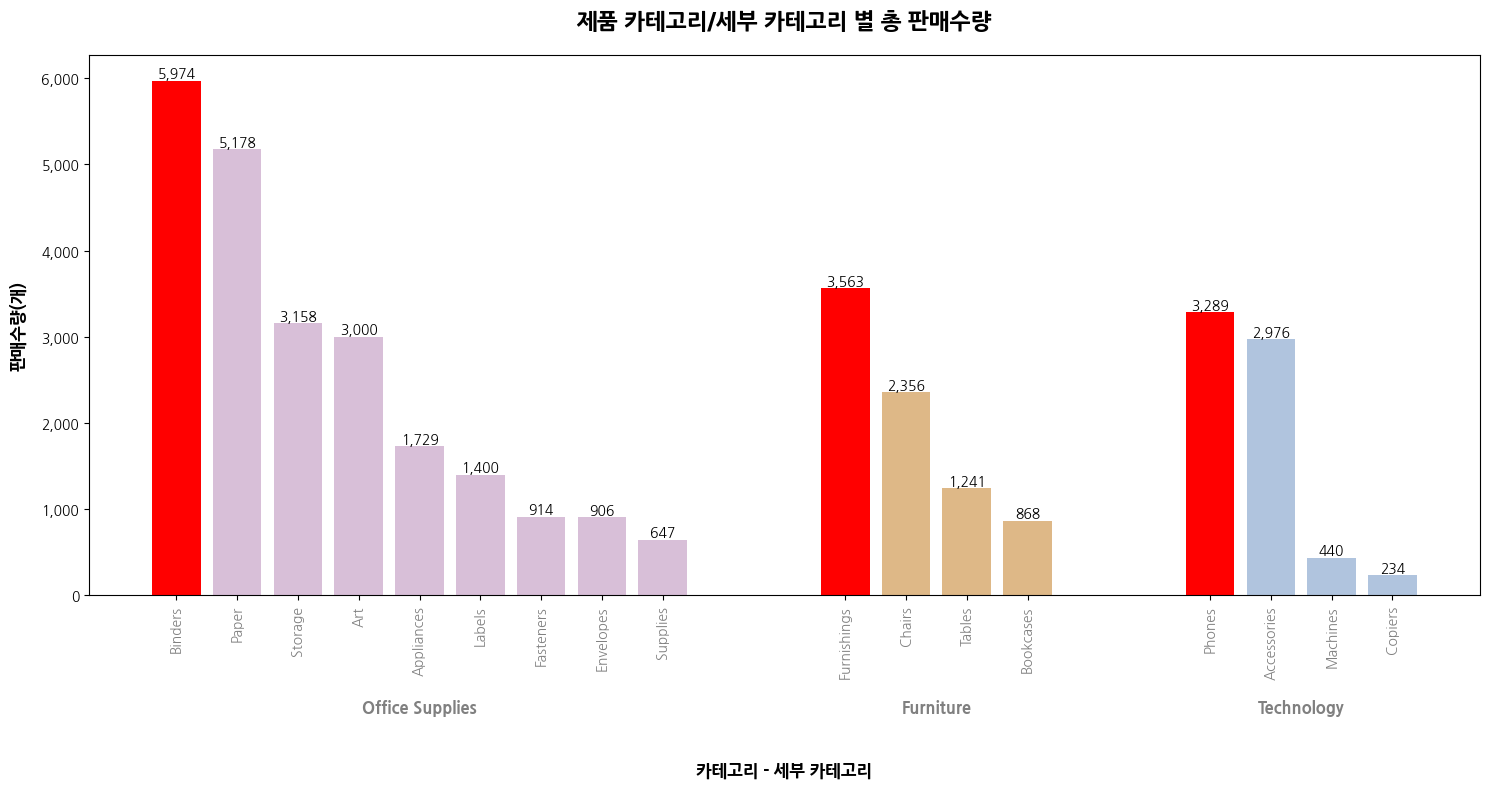

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# 카테고리 별 판매된 개수 세기
sales_total_count_by_type_flat = sales_by_category.reset_index()

# Define your color mapping for the categories (default colors)
default_colors = {
    'Office Supplies': 'thistle',
    'Furniture': 'burlywood',
    'Technology': 'lightsteelblue'
}

# Get the unique product types
product_types = sales_total_count_by_type_flat['Category'].unique()

# To create space between categories, we will increment the x values for each category.
category_spacing = 2  # Adjust the space between categories
x_positions = []
start = 0

# Calculate x positions for bars within each category
for product_type in product_types:
    count = sales_total_count_by_type_flat[sales_total_count_by_type_flat['Category'] == product_type].shape[0]
    x_positions.extend(np.arange(start, start + count))
    start += count + category_spacing

# Create a color array where the max in each category will be red
bar_colors = []

# Loop through each category, detect the max and color accordingly
for product_type in product_types:
    sub_df = sales_total_count_by_type_flat[sales_total_count_by_type_flat['Category'] == product_type]
    max_value = sub_df['Quantity'].max()

    for _, row in sub_df.iterrows():
        if row['Quantity'] == max_value:
            bar_colors.append('red')  # Highlight the max count with red
        else:
            bar_colors.append(default_colors[product_type])  # Default color for the rest

# Visualization
plt.figure(figsize=(15, 8))

# Plot the bars at the computed x positions
plt.bar(x_positions, sales_total_count_by_type_flat['Quantity'], color=bar_colors)

# Add labels on top of the bars for each product
for i, count in enumerate(sales_total_count_by_type_flat['Quantity']):
    plt.text(x_positions[i], count + 5, f'{int(count):,}', ha='center', va='bottom', fontsize=10)

# Add product_name labels to the x-axis
plt.xticks(x_positions, sales_total_count_by_type_flat['Sub-Category'], rotation=90, fontsize=10, color='gray')

# Add category labels (large text) in between sections, with more space to avoid overlap
category_midpoints = []
start = 0
for product_type in product_types:
    count = sales_total_count_by_type_flat[sales_total_count_by_type_flat['Category'] == product_type].shape[0]
    midpoint = start + count / 2 - 0.5  # Find the middle of the category group
    category_midpoints.append(midpoint)
    start += count + category_spacing

# Place product type labels above the category groups
for i, product_type in enumerate(product_types):
    plt.text(category_midpoints[i], -1400, product_type, ha='center', va='bottom', fontsize=12, weight='bold', color='gray')  # Move label higher to avoid overlap

# Formatting the plot
plt.title('제품 카테고리/세부 카테고리 별 총 판매수량', fontsize=16, weight='bold', pad=20)
plt.xlabel('카테고리 - 세부 카테고리', fontsize=12, labelpad=60, weight='bold')
plt.ylabel('판매수량(개)', fontsize=12, labelpad=10, weight='bold')

# Format y-axis ticks with thousands separator
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))


plt.tight_layout()

# Show the plot
plt.show()


# 세부 카테고리 별 매출

In [ ]:
sales.iloc[:3]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [ ]:
sales['Category'] = pd.Categorical(sales['Category'], categories=['Office Supplies', 'Furniture', 'Technology'], ordered=True)

In [ ]:
sales_by_category = sales.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index().sort_values(by=['Category', 'Sales'], ascending=[True, False]).set_index(['Category', 'Sub-Category'])
sales_by_category = sales_by_category[sales_by_category['Sales'] != 0]
sales_by_category.head(5)

<ipython-input-20-61d4b13adbf6>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_category = sales.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index().sort_values(by=['Category', 'Sales'], ascending=[True, False]).set_index(['Category', 'Sub-Category'])


Sales
Category        Sub-Category            
Office Supplies Storage       223843.608
                Binders       203412.733
                Appliances    107532.161
                Paper          78479.206
                Supplies       46673.538

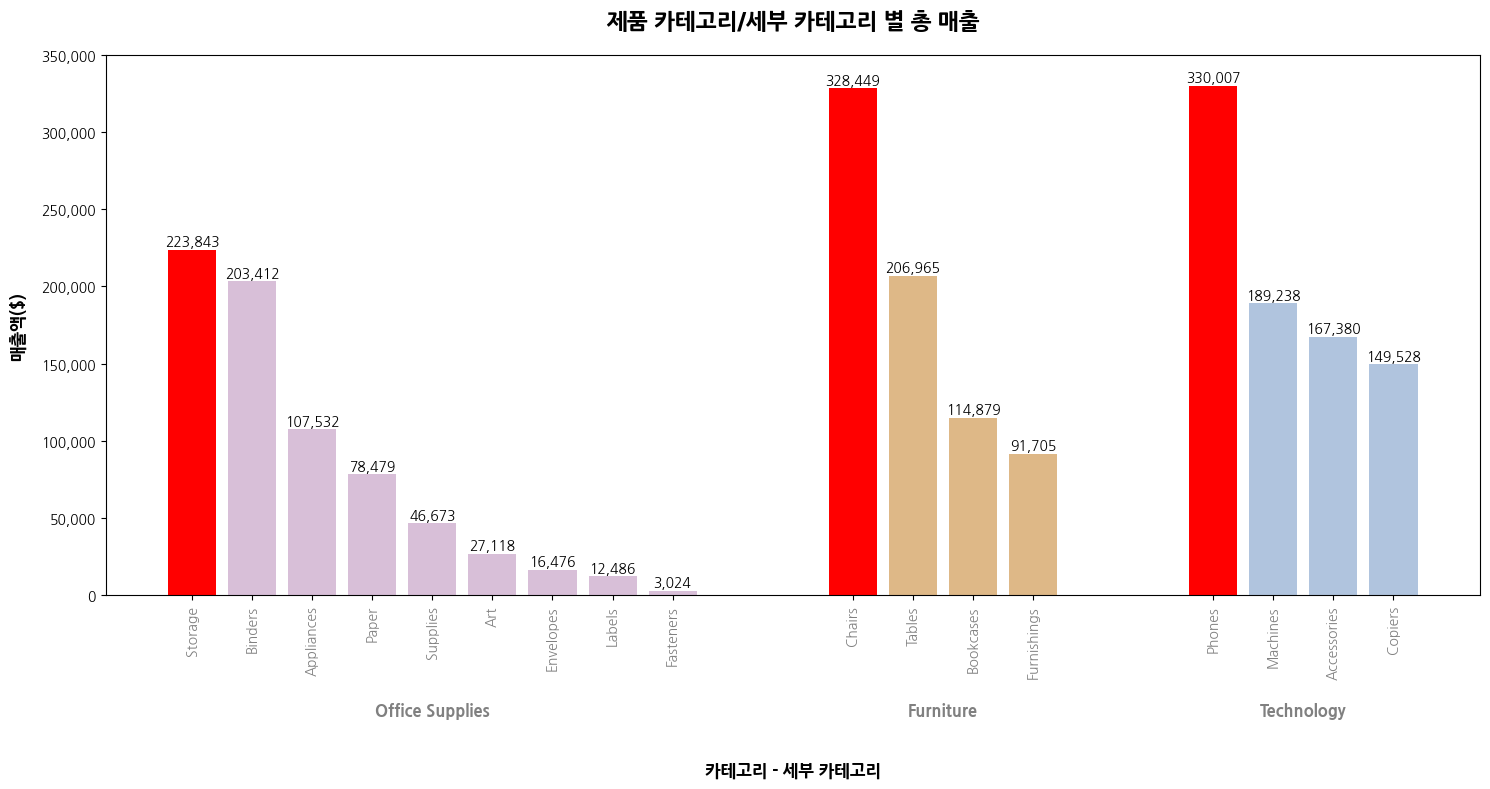

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# 카테고리 별 판매된 개수 세기
sales_total_count_by_type_flat = sales_by_category.reset_index()

# Define your color mapping for the categories (default colors)
default_colors = {
    'Office Supplies': 'thistle',
    'Furniture': 'burlywood',
    'Technology': 'lightsteelblue'
}

# Get the unique product types
product_types = sales_total_count_by_type_flat['Category'].unique()

# To create space between categories, we will increment the x values for each category.
category_spacing = 2  # Adjust the space between categories
x_positions = []
start = 0

# Calculate x positions for bars within each category
for product_type in product_types:
    count = sales_total_count_by_type_flat[sales_total_count_by_type_flat['Category'] == product_type].shape[0]
    x_positions.extend(np.arange(start, start + count))
    start += count + category_spacing

# Create a color array where the max in each category will be red
bar_colors = []

# Loop through each category, detect the max and color accordingly
for product_type in product_types:
    sub_df = sales_total_count_by_type_flat[sales_total_count_by_type_flat['Category'] == product_type]
    max_value = sub_df['Sales'].max()

    for _, row in sub_df.iterrows():
        if row['Sales'] == max_value:
            bar_colors.append('red')  # Highlight the max count with red
        else:
            bar_colors.append(default_colors[product_type])  # Default color for the rest

# Visualization
plt.figure(figsize=(15, 8))

# Plot the bars at the computed x positions
plt.bar(x_positions, sales_total_count_by_type_flat['Sales'], color=bar_colors)

# Add labels on top of the bars for each product
for i, count in enumerate(sales_total_count_by_type_flat['Sales']):
    plt.text(x_positions[i], count + 1000, f'{int(count):,}', ha='center', va='bottom', fontsize=10)

# Add product_name labels to the x-axis
plt.xticks(x_positions, sales_total_count_by_type_flat['Sub-Category'], rotation=90, fontsize=10, color='gray')

# Add category labels (large text) in between sections, with more space to avoid overlap
category_midpoints = []
start = 0
for product_type in product_types:
    count = sales_total_count_by_type_flat[sales_total_count_by_type_flat['Category'] == product_type].shape[0]
    midpoint = start + count / 2 - 0.5  # Find the middle of the category group
    category_midpoints.append(midpoint)
    start += count + category_spacing

# Place product type labels above the category groups
for i, product_type in enumerate(product_types):
    plt.text(category_midpoints[i], -80000, product_type, ha='center', va='bottom', fontsize=12, weight='bold', color='gray')  # Move label higher to avoid overlap

# Formatting the plot
plt.title('제품 카테고리/세부 카테고리 별 총 매출', fontsize=16, weight='bold', pad=20)
plt.xlabel('카테고리 - 세부 카테고리', fontsize=12, labelpad=60, weight='bold')
plt.ylabel('매출액($)', fontsize=12, labelpad=10, weight='bold')

plt.ylim(0, 350000)

# Format y-axis ticks with thousands separator
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))


plt.tight_layout()

# Show the plot
plt.show()


# 월 별 주문 카테고리 비율

In [ ]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'])

In [ ]:
sales.set_index('Order Date', inplace=True)

In [ ]:
sales.index

DatetimeIndex(['2016-11-08', '2016-11-08', '2016-06-12', '2015-10-11',
               '2015-10-11', '2014-06-09', '2014-06-09', '2014-06-09',
               '2014-06-09', '2014-06-09',
               ...
               '2015-05-17', '2015-05-17', '2016-09-29', '2017-11-17',
               '2017-11-17', '2014-01-21', '2017-02-26', '2017-02-26',
               '2017-02-26', '2017-05-04'],
              dtype='datetime64[ns]', name='Order Date', length=9994, freq=None)

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9994 entries, 2016-11-08 to 2017-05-04
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Row ID         9994 non-null   int64   
 1   Order ID       9994 non-null   object  
 2   Ship Date      9994 non-null   object  
 3   Ship Mode      9994 non-null   object  
 4   Customer ID    9994 non-null   object  
 5   Customer Name  9994 non-null   object  
 6   Segment        9994 non-null   object  
 7   Country        9994 non-null   object  
 8   City           9994 non-null   object  
 9   State          9994 non-null   object  
 10  Postal Code    9994 non-null   int64   
 11  Region         9994 non-null   object  
 12  Product ID     9994 non-null   object  
 13  Category       9994 non-null   category
 14  Sub-Category   9994 non-null   object  
 15  Product Name   9994 non-null   object  
 16  Sales          9994 non-null   float64 
 17  Quantity       

In [ ]:
sales.head(3)

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
2016-11-08,2,CA-2016-152156,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2016-06-12,3,CA-2016-138688,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [ ]:
sales.groupby([pd.Grouper(freq='MS'), 'Category']).agg({'Order ID': pd.Series.nunique})

<ipython-input-31-b6ba2b2f7959>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales.groupby([pd.Grouper(freq='MS'), 'Category']).agg({'Order ID': pd.Series.nunique})


Order ID
Order Date Category                 
2014-01-01 Office Supplies        26
           Furniture              17
           Technology              7
2014-02-01 Office Supplies        22
           Furniture               6
...                              ...
2017-11-01 Furniture              85
           Technology             79
2017-12-01 Office Supplies       171
           Furniture              84
           Technology             63

[144 rows x 1 columns]

In [ ]:
sales.groupby([pd.Grouper(freq='MS'), 'Category']).agg({'Order ID': pd.Series.nunique}).unstack().iloc[:10]

<ipython-input-32-1c6f2d48270c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales.groupby([pd.Grouper(freq='MS'), 'Category']).agg({'Order ID': pd.Series.nunique}).unstack().iloc[:10]


Order ID                     
Category   Office Supplies Furniture Technology
Order Date                                     
2014-01-01              26        17          7
2014-02-01              22         6          7
2014-03-01              58        26         19
2014-04-01              51        21         22
2014-05-01              46        23         20
2014-06-01              50        25         17
2014-07-01              52        25         23
2014-08-01              58        23         24
2014-09-01             102        49         33
2014-10-01              57        28         27

In [ ]:
a = sales.groupby([pd.Grouper(freq='MS')]).agg({'Order ID': pd.Series.nunique})
a.head(3)

,Order ID
Order Date,
2014-01-01,32
2014-02-01,28
2014-03-01,71


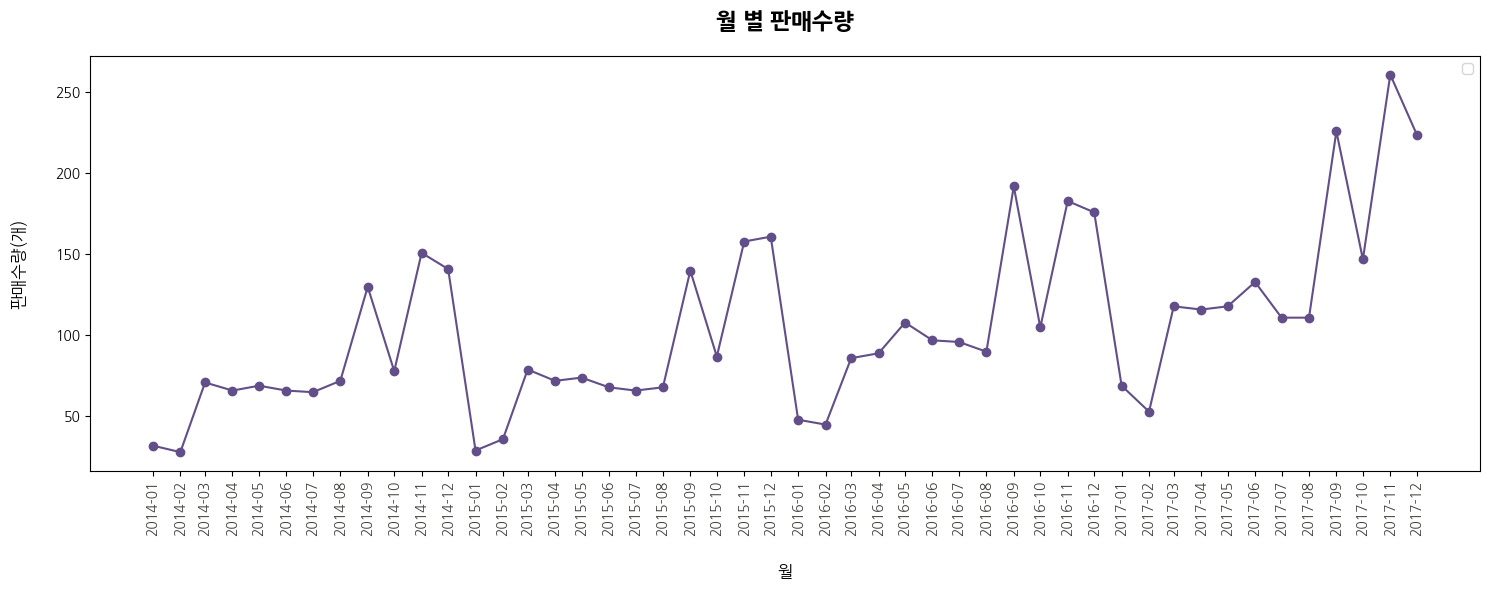

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is already set with 'Order Date' as the index and the three category columns

# Plot the time series for each category
plt.figure(figsize=(15, 6))

default_colors = {
    'Office Supplies': 'thistle',
    'Furniture': 'burlywood',
    'Technology': 'lightsteelblue'
}


# Plot each category
plt.plot(a.index, a['Order ID'], marker='o', color='#624E88')

# Adding labels and title
plt.title('월 별 판매수량', fontsize=16, weight='bold', pad=20)
plt.xlabel('월', fontsize=12, labelpad=20)
plt.ylabel('판매수량(개)', fontsize=12, labelpad=20)

# Show the legend
plt.legend()

# Rotate the x-axis labels for better readability
plt.xticks(a.index, a.index.strftime('%Y-%m'), rotation=90, color='#3C3D37')


# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
a = sales.groupby([pd.Grouper(freq='MS'), 'Category']).agg({'Order ID': pd.Series.nunique}).unstack()

<ipython-input-33-8f0904dfa5ed>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a = sales.groupby([pd.Grouper(freq='MS'), 'Category']).agg({'Order ID': pd.Series.nunique}).unstack()


In [ ]:
a['Order ID']['Office Supplies']

,Office Supplies
Order Date,
2014-01-01,26
2014-02-01,22
2014-03-01,58
2014-04-01,51
2014-05-01,46
2014-06-01,50
2014-07-01,52
2014-08-01,58
2014-09-01,102


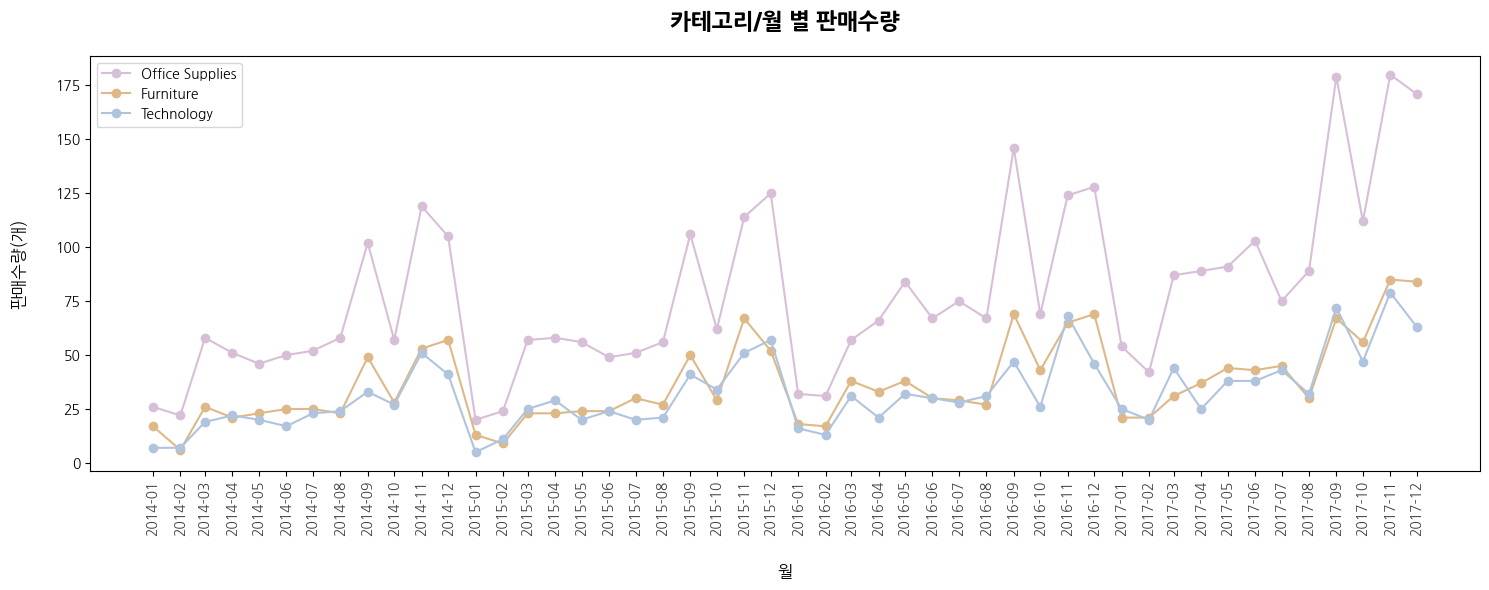

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is already set with 'Order Date' as the index and the three category columns

# Plot the time series for each category
plt.figure(figsize=(15, 6))

default_colors = {
    'Office Supplies': 'thistle',
    'Furniture': 'burlywood',
    'Technology': 'lightsteelblue'
}


# Plot each category
plt.plot(a.index, a['Order ID']['Office Supplies'], label='Office Supplies', marker='o', color=default_colors['Office Supplies'])
plt.plot(a.index, a['Order ID']['Furniture'], label='Furniture', marker='o', color=default_colors['Furniture'])
plt.plot(a.index, a['Order ID']['Technology'], label='Technology', marker='o', color=default_colors['Technology'])

# Adding labels and title
plt.title('카테고리/월 별 판매수량', fontsize=16, weight='bold', pad=20)
plt.xlabel('월', fontsize=12, labelpad=20)
plt.ylabel('판매수량(개)', fontsize=12, labelpad=20)

# Show the legend
plt.legend()

# Rotate the x-axis labels for better readability
plt.xticks(a.index, a.index.strftime('%Y-%m'), rotation=90, color='#3C3D37')


# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
a = sales.groupby([pd.Grouper(freq='QS')]).agg({'Order ID': pd.Series.nunique})
a.head(5)

,Order ID
Order Date,
2014-01-01,131
2014-04-01,201
2014-07-01,267
2014-10-01,370
2015-01-01,144


In [ ]:
# Assuming your dataframe 'a' has a DatetimeIndex
a.index = a.index.to_period('Q')
a.index = a.index.map(lambda x: str(x).replace('Q', '-Q'))

# Now, your index will be in 'YYYY-Qn' format
a.index

Index(['2014-Q1', '2014-Q2', '2014-Q3', '2014-Q4', '2015-Q1', '2015-Q2',
       '2015-Q3', '2015-Q4', '2016-Q1', '2016-Q2', '2016-Q3', '2016-Q4',
       '2017-Q1', '2017-Q2', '2017-Q3', '2017-Q4'],
      dtype='object', name='Order Date')

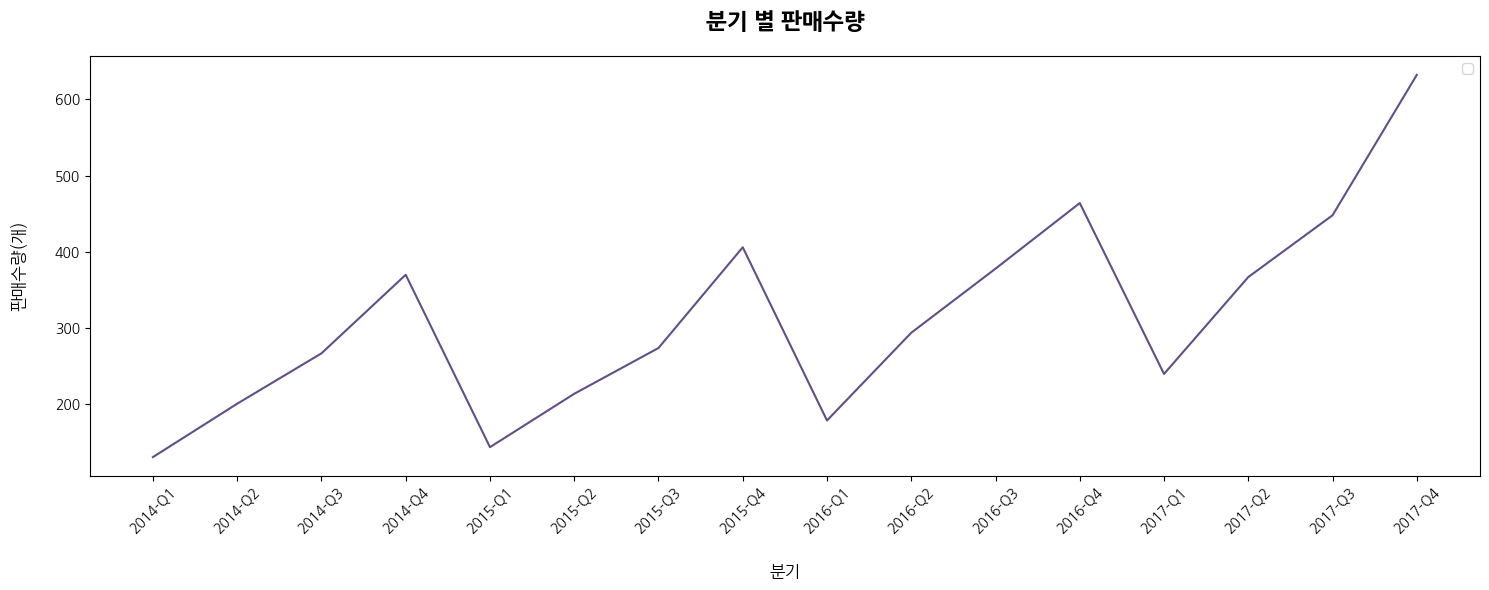

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'a' is your dataframe after the groupby operation

# Convert the PeriodIndex to string format for plotting purposes
a.index = a.index.astype(str)

# Plot the time series for each category
plt.figure(figsize=(15, 6))

# Define default colors for categories
default_colors = {
    'Office Supplies': 'thistle',
    'Furniture': 'burlywood',
    'Technology': 'lightsteelblue'
}

# Plot each category
plt.plot(a.index, a['Order ID'], color='#624E88')

# Adding labels and title
plt.title('분기 별 판매수량', fontsize=16, weight='bold', pad=20)
plt.xlabel('분기', fontsize=12, labelpad=20)
plt.ylabel('판매수량(개)', fontsize=12, labelpad=20)

# Show the legend
plt.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
a = sales.groupby([pd.Grouper(freq='QS'), 'Category']).agg({'Order ID': pd.Series.nunique}).unstack()

<ipython-input-60-4890049d4224>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a = sales.groupby([pd.Grouper(freq='QS'), 'Category']).agg({'Order ID': pd.Series.nunique}).unstack()


In [ ]:
a

Order ID                     
Category   Office Supplies Furniture Technology
Order Date                                     
2014-01-01             106        49         33
2014-04-01             147        69         59
2014-07-01             212        97         80
2014-10-01             281       138        119
2015-01-01             101        45         41
2015-04-01             163        71         73
2015-07-01             213       107         82
2015-10-01             301       148        142
2016-01-01             120        73         60
2016-04-01             217       101         83
2016-07-01             288       125        106
2016-10-01             321       177        140
2017-01-01             183        73         89
2017-04-01             283       124        101
2017-07-01             343       142        147
2017-10-01             463       225        189

In [ ]:
a.index

DatetimeIndex(['2014-01-01', '2014-04-01', '2014-07-01', '2014-10-01',
               '2015-01-01', '2015-04-01', '2015-07-01', '2015-10-01',
               '2016-01-01', '2016-04-01', '2016-07-01', '2016-10-01',
               '2017-01-01', '2017-04-01', '2017-07-01', '2017-10-01'],
              dtype='datetime64[ns]', name='Order Date', freq='QS-JAN')

In [ ]:
# Assuming your dataframe 'a' has a DatetimeIndex
a.index = a.index.to_period('Q')
a.index = a.index.map(lambda x: str(x).replace('Q', '-Q'))

# Now, your index will be in 'YYYY-Qn' format
a.index

Index(['2014-Q1', '2014-Q2', '2014-Q3', '2014-Q4', '2015-Q1', '2015-Q2',
       '2015-Q3', '2015-Q4', '2016-Q1', '2016-Q2', '2016-Q3', '2016-Q4',
       '2017-Q1', '2017-Q2', '2017-Q3', '2017-Q4'],
      dtype='object', name='Order Date')

In [ ]:
a.head(5)

Order ID                     
Category   Office Supplies Furniture Technology
Order Date                                     
2014-Q1                106        49         33
2014-Q2                147        69         59
2014-Q3                212        97         80
2014-Q4                281       138        119
2015-Q1                101        45         41

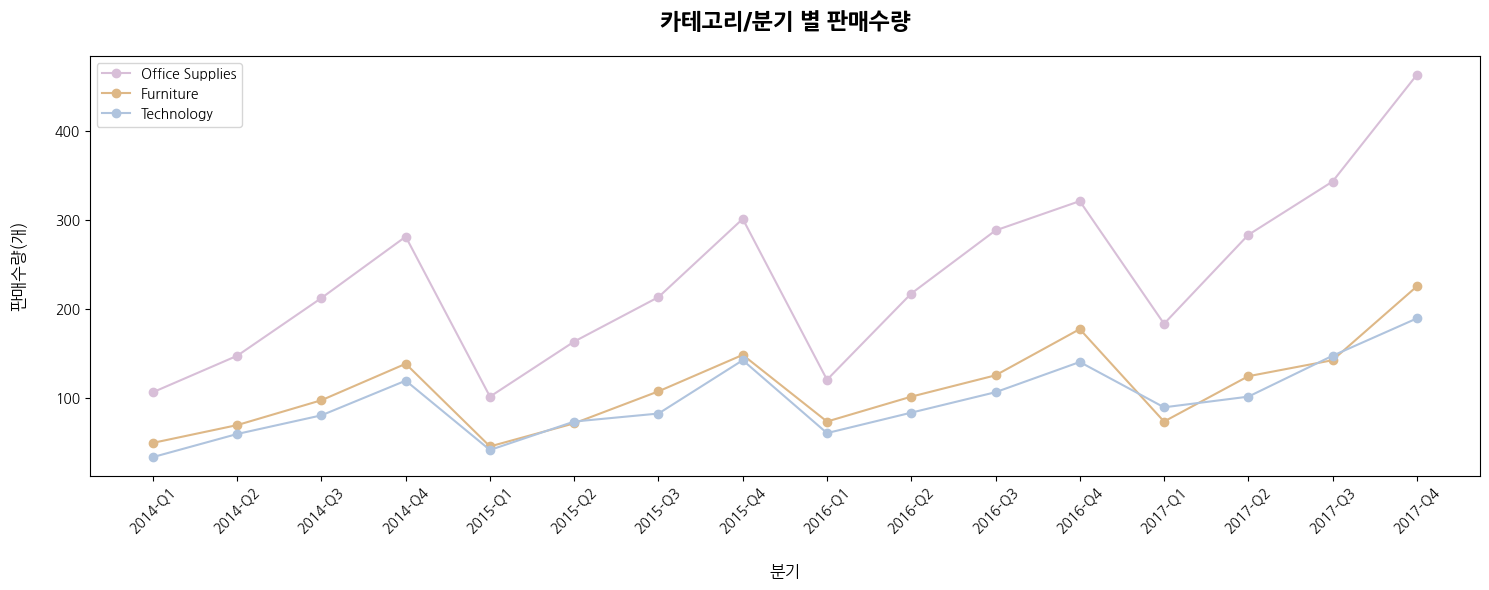

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'a' is your dataframe after the groupby operation

# Convert the PeriodIndex to string format for plotting purposes
a.index = a.index.astype(str)

# Plot the time series for each category
plt.figure(figsize=(15, 6))

# Define default colors for categories
default_colors = {
    'Office Supplies': 'thistle',
    'Furniture': 'burlywood',
    'Technology': 'lightsteelblue'
}

# Plot each category
plt.plot(a.index, a['Order ID']['Office Supplies'], label='Office Supplies', marker='o', color=default_colors['Office Supplies'])
plt.plot(a.index, a['Order ID']['Furniture'], label='Furniture', marker='o', color=default_colors['Furniture'])
plt.plot(a.index, a['Order ID']['Technology'], label='Technology', marker='o', color=default_colors['Technology'])

# Adding labels and title
plt.title('카테고리/분기 별 판매수량', fontsize=16, weight='bold', pad=20)
plt.xlabel('분기', fontsize=12, labelpad=20)
plt.ylabel('판매수량(개)', fontsize=12, labelpad=20)

# Show the legend
plt.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


# 시기 별 매출

In [ ]:
a = sales.groupby([pd.Grouper(freq='MS')]).agg({'Sales': 'sum'})
a.head(3)

,Sales
Order Date,
2014-01-01,14236.895
2014-02-01,4519.892
2014-03-01,55691.009


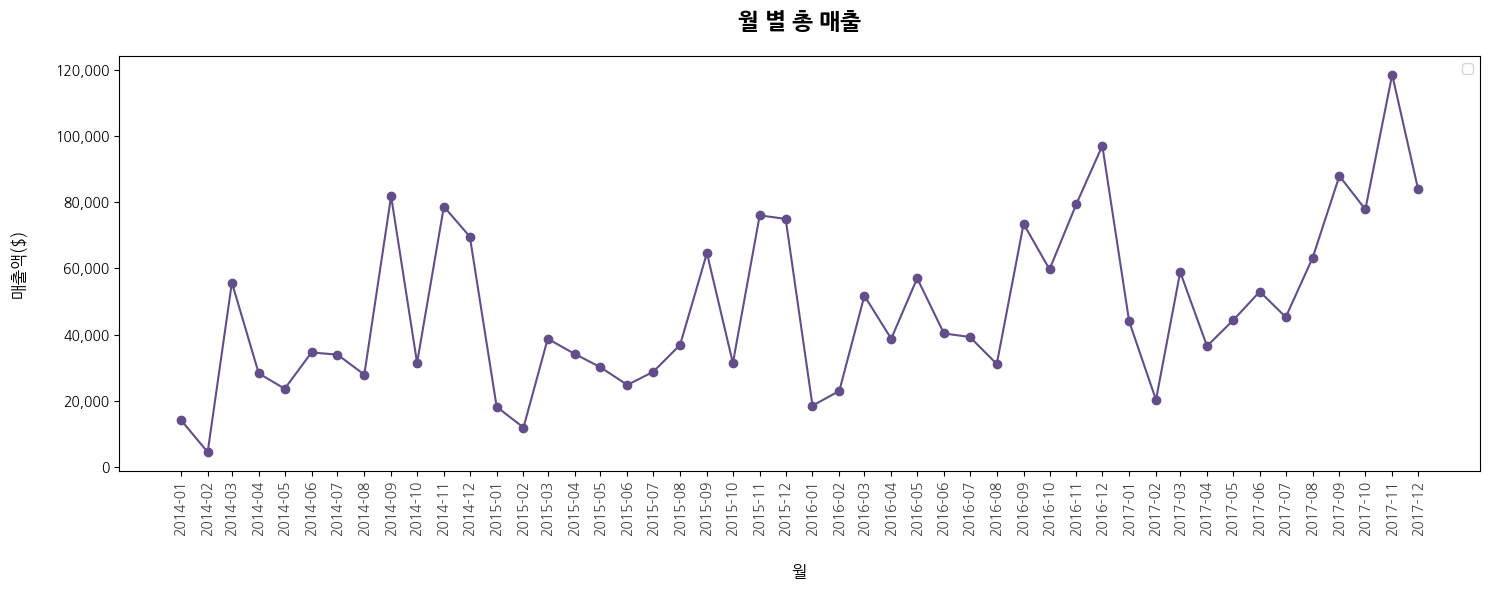

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is already set with 'Order Date' as the index and the three category columns

# Plot the time series for each category
plt.figure(figsize=(15, 6))

default_colors = {
    'Office Supplies': 'thistle',
    'Furniture': 'burlywood',
    'Technology': 'lightsteelblue'
}


# Plot each category
plt.plot(a.index, a['Sales'], marker='o', color='#624E88')

# Adding labels and title
plt.title('월 별 총 매출', fontsize=16, weight='bold', pad=20)
plt.xlabel('월', fontsize=12, labelpad=20)
plt.ylabel('매출액($)', fontsize=12, labelpad=20)

# Show the legend
plt.legend()

# Rotate the x-axis labels for better readability
plt.xticks(a.index, a.index.strftime('%Y-%m'), rotation=90, color='#3C3D37')

# Format y-axis ticks with thousands separator
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
a = sales.groupby([pd.Grouper(freq='QS')]).agg({'Sales': 'sum'})
a.head(3)

,Sales
Order Date,
2014-01-01,74447.7960
2014-04-01,86538.7596
2014-07-01,143633.2123


In [ ]:
# Assuming your dataframe 'a' has a DatetimeIndex
a.index = a.index.to_period('Q')
a.index = a.index.map(lambda x: str(x).replace('Q', '-Q'))

# Now, your index will be in 'YYYY-Qn' format
a.index

Index(['2014-Q1', '2014-Q2', '2014-Q3', '2014-Q4', '2015-Q1', '2015-Q2',
       '2015-Q3', '2015-Q4', '2016-Q1', '2016-Q2', '2016-Q3', '2016-Q4',
       '2017-Q1', '2017-Q2', '2017-Q3', '2017-Q4'],
      dtype='object', name='Order Date')

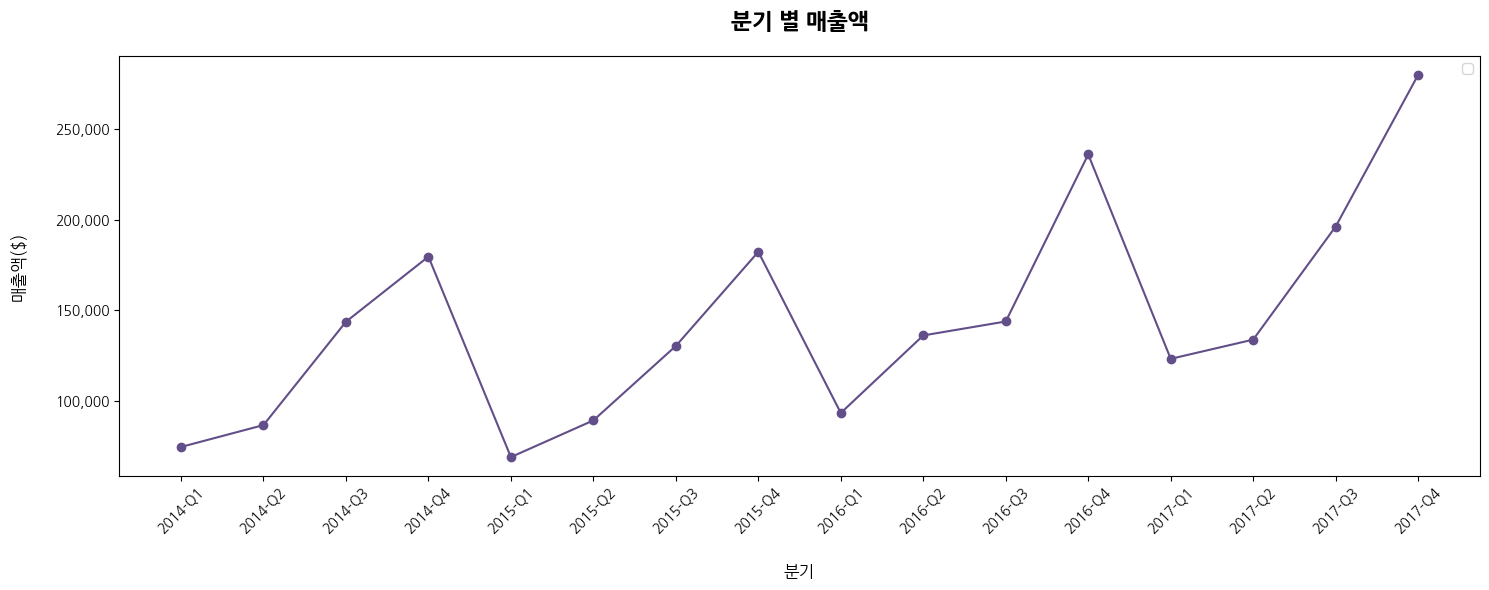

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'a' is your dataframe after the groupby operation

# Convert the PeriodIndex to string format for plotting purposes
a.index = a.index.astype(str)

# Plot the time series for each category
plt.figure(figsize=(15, 6))

# Define default colors for categories
default_colors = {
    'Office Supplies': 'thistle',
    'Furniture': 'burlywood',
    'Technology': 'lightsteelblue'
}

# Plot each category
plt.plot(a.index, a['Sales'], marker='o', color='#624E88')

# Adding labels and title
plt.title('분기 별 매출액', fontsize=16, weight='bold', pad=20)
plt.xlabel('분기', fontsize=12, labelpad=20)
plt.ylabel('매출액($)', fontsize=12, labelpad=20)

# Format y-axis ticks with thousands separator
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))


# Show the legend
plt.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
a = sales.groupby([pd.Grouper(freq='MS'), 'Category']).agg({'Sales': 'sum'}).unstack()
a.head(3)

<ipython-input-68-382e74f66099>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a = sales.groupby([pd.Grouper(freq='MS'), 'Category']).agg({'Sales': 'sum'}).unstack()


Sales                      
Category   Office Supplies  Furniture Technology
Order Date                                      
2014-01-01        4851.080   6242.525   3143.290
2014-02-01        1071.724   1839.658   1608.510
2014-03-01        8605.879  14573.956  32511.174

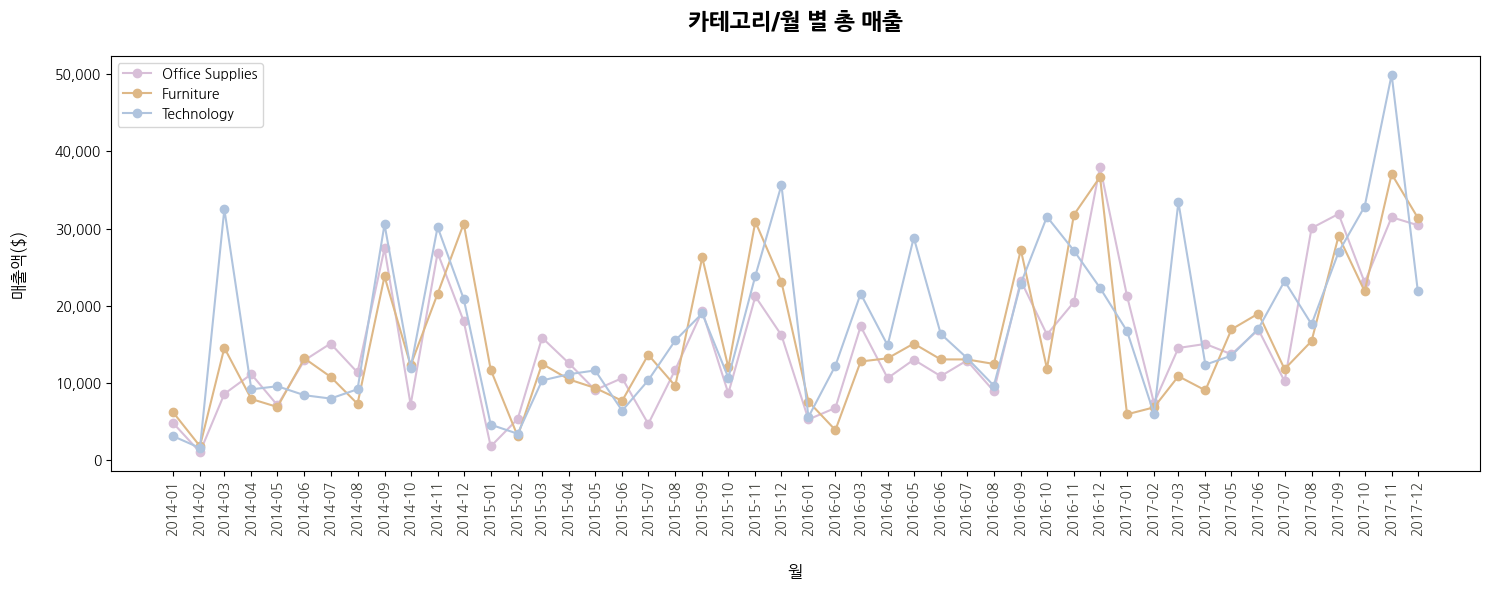

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is already set with 'Order Date' as the index and the three category columns

# Plot the time series for each category
plt.figure(figsize=(15, 6))

default_colors = {
    'Office Supplies': 'thistle',
    'Furniture': 'burlywood',
    'Technology': 'lightsteelblue'
}


# Plot each category
plt.plot(a.index, a['Sales']['Office Supplies'], label='Office Supplies', marker='o', color=default_colors['Office Supplies'])
plt.plot(a.index, a['Sales']['Furniture'], label='Furniture', marker='o', color=default_colors['Furniture'])
plt.plot(a.index, a['Sales']['Technology'], label='Technology', marker='o', color=default_colors['Technology'])

# Adding labels and title
plt.title('카테고리/월 별 총 매출', fontsize=16, weight='bold', pad=20)
plt.xlabel('월', fontsize=12, labelpad=20)
plt.ylabel('매출액($)', fontsize=12, labelpad=20)

# Show the legend
plt.legend()

# Rotate the x-axis labels for better readability
plt.xticks(a.index, a.index.strftime('%Y-%m'), rotation=90, color='#3C3D37')

# Format y-axis ticks with thousands separator
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Display the plot
plt.tight_layout()
plt.show()


# 주문 시, 몇 개의 상품을 같이 주문하는지

In [ ]:
sales.iloc[:3]

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
2016-11-08,2,CA-2016-152156,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2016-06-12,3,CA-2016-138688,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [ ]:
sales.groupby(['Order ID'])['Product Name'].nunique()

,Product Name
Order ID,
CA-2014-100006,1
CA-2014-100090,2
CA-2014-100293,1
CA-2014-100328,1
CA-2014-100363,2
...,...
US-2017-168802,1
US-2017-169320,2
US-2017-169488,2


In [ ]:
sales.groupby(['Order ID'])['Product Name'].nunique().describe()

,Product Name
count,5009.000000
mean,1.993611
std,1.408823
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,14.000000


In [ ]:
order_counts = sales.groupby(['Order ID'])['Product Name'].nunique()

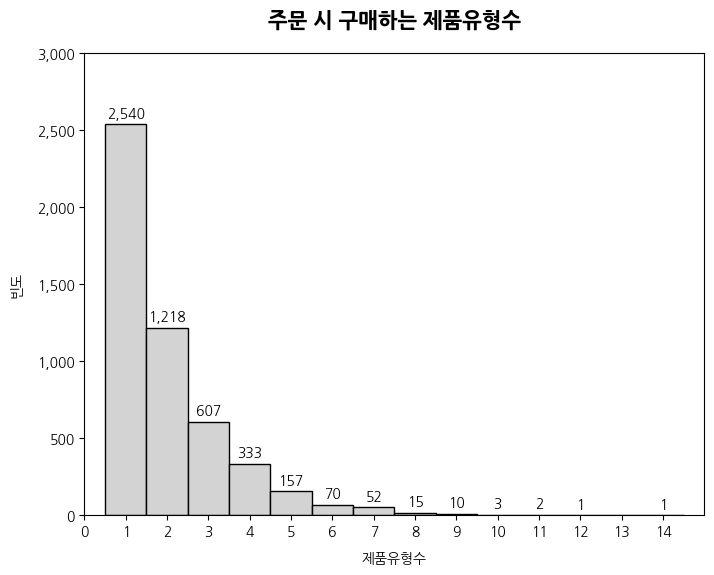

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# 히스토그램 그리기
plt.figure(figsize=(8, 6))
counts, bins, patches = plt.hist(order_counts, bins=range(1, order_counts.max() + 2), edgecolor='black', color='lightgrey', align='left')

#plt.hist(order_counts, bins=range(1, order_counts.max() + 2), edgecolor='black', color='darkgray', align='left')
plt.title('주문 시 구매하는 세부카테고리수', weight='bold', pad=20, size=15)
plt.xlabel('제품유형수', labelpad = 10)
plt.ylabel('빈도', labelpad = 10)
#plt.grid(True)

plt.ylim(0, 3000)
plt.xlim(0, 15)
plt.xticks(range(0, 15))  # x-axis ticks 설정

# 각 막대 위에 값 표시
for count, bin_edge in zip(counts, bins):
    if count > 0:  # 빈도수가 0인 막대에는 값 표시 안함
        plt.text(bin_edge, count + 30, f'{int(count):,}', ha='center', va='bottom', fontsize=10)


# Add thousands separator to the y-axis ticks
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))


# 그래프 보여주기
plt.show()


# 잘 팔린 제품들

In [ ]:
sales.iloc[:3]

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
2016-11-08,2,CA-2016-152156,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2016-06-12,3,CA-2016-138688,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [ ]:
sales.groupby(['Product Name'])['Row ID'].count().sort_values(ascending=False)

,Row ID
Product Name,
Staple envelope,48
Staples,46
Easy-staple paper,46
Avery Non-Stick Binders,20
Staples in misc. colors,19
...,...
Xerox 1922,1
4009 Highlighters,1
Belkin 8 Outlet SurgeMaster II Gold Surge Protector with Phone Protection,1


In [ ]:
sales.groupby(['Product Name'])['Row ID'].count().sort_values(ascending=False)

,Row ID
Product Name,
Staple envelope,48
Staples,46
Easy-staple paper,46
Avery Non-Stick Binders,20
Staples in misc. colors,19
...,...
Xerox 1922,1
4009 Highlighters,1
Belkin 8 Outlet SurgeMaster II Gold Surge Protector with Phone Protection,1


In [ ]:
sales.groupby(['Product Name'])['Row ID'].count().sort_values(ascending=False)

,Row ID
Product Name,
Staple envelope,48
Staples,46
Easy-staple paper,46
Avery Non-Stick Binders,20
Staples in misc. colors,19
...,...
Xerox 1922,1
4009 Highlighters,1
Belkin 8 Outlet SurgeMaster II Gold Surge Protector with Phone Protection,1


In [ ]:
sales.groupby(['Category', 'Sub-Category', 'Product Name']).agg({
    'Quantity': 'sum',
    'Row ID': pd.Series.nunique,  # Use pd.Series.nunique to count unique values
    'Sales': 'sum',
}).sort_values(by=['Quantity', 'Row ID', 'Sales'], ascending=[False, False, False]).head(10)

<ipython-input-110-2fb0acf5d2d3>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales.groupby(['Category', 'Sub-Category', 'Product Name']).agg({


Quantity  \
Category        Sub-Category Product Name                                                   
Office Supplies Fasteners    Staples                                                  215   
                Envelopes    Staple envelope                                          170   
                Paper        Easy-staple paper                                        150   
                Art          Staples in misc. colors                                   86   
Furniture       Tables       KI Adjustable-Height Table                                74   
Office Supplies Binders      Avery Non-Stick Binders                                   71   
                             Storex Dura Pro Binders                                   71   
                             GBC Premium Transparent Covers with Diagonal Li...        67   
Furniture       Chairs       Situations Contoured Folding Chairs, 4/Set                64   
                Furnishings  Staple-based wall hangings                                62   

                                                                                 Row ID  \
Category        Sub-Category Product Name                                                 
Office Supplies Fasteners    Staples                                               46.0   
                Envelopes    Staple envelope                                       48.0   
                Paper        Easy-staple paper                                     46.0   
                Art          Staples in misc. colors                               19.0   
Furniture       Tables       KI Adjustable-Height Table                            18.0   
Office Supplies Binders      Avery Non-Stick Binders                               20.0   
                             Storex Dura Pro Binders                               17.0   
                             GBC Premium Transparent Covers with Diagonal Li...    14.0   
Furniture       Chairs       Situations Contoured Folding Chairs, 4/Set            15.0   
                Furnishings  Staple-based wall hangings                            16.0   

                                                                                    Sales  
Category        Sub-Category Product Name                                                  
Office Supplies Fasteners    Staples                                              755.470  
                Envelopes    Staple envelope                                     1686.812  
                Paper        Easy-staple paper                                   2504.192  
                Art          Staples in misc. colors                              478.812  
Furniture       Tables       KI Adjustable-Height Table                          4552.641  
Office Supplies Binders      Avery Non-Stick Binders                              217.316  
                             Storex Dura Pro Binders                              278.586  
                             GBC Premium Transparent Covers with Diagonal Li...   780.456  
Furniture       Chairs       Situations Contoured Folding Chairs, 4/Set          3641.274  
                Furnishings  Staple-based wall hangings                           422.288

In [ ]:
sales.iloc[:3]

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
2016-11-08,2,CA-2016-152156,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2016-06-12,3,CA-2016-138688,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [ ]:
sales.groupby(['Product Name'])['Sales'].sum().sort_values(ascending=False).head(10)

,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
HON 5400 Series Task Chairs for Big and Tall,21870.576
GBC DocuBind TL300 Electric Binding System,19823.479
GBC Ibimaster 500 Manual ProClick Binding System,19024.500
Hewlett Packard LaserJet 3310 Copier,18839.686
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.895
GBC DocuBind P400 Electric Binding System,17965.068


In [ ]:
sales.groupby(['Category', 'Sub-Category', 'Product Name']).agg({
    'Sales': 'sum',
    'Row ID': pd.Series.nunique,  # Use pd.Series.nunique to count unique values
    'Quantity': 'sum',
}).sort_values(by=['Sales', 'Row ID', 'Quantity'], ascending=[False, False, False]).head(10)


<ipython-input-111-7153d4be0625>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales.groupby(['Category', 'Sub-Category', 'Product Name']).agg({


Sales  \
Category        Sub-Category Product Name                                                    
Technology      Copiers      Canon imageCLASS 2200 Advanced Copier               61599.824   
Office Supplies Binders      Fellowes PB500 Electric Punch Plastic Comb Bind...  27453.384   
Technology      Machines     Cisco TelePresence System EX90 Videoconferencin...  22638.480   
Furniture       Chairs       HON 5400 Series Task Chairs for Big and Tall        21870.576   
Office Supplies Binders      GBC DocuBind TL300 Electric Binding System          19823.479   
                             GBC Ibimaster 500 Manual ProClick Binding System    19024.500   
Technology      Copiers      Hewlett Packard LaserJet 3310 Copier                18839.686   
                Machines     HP Designjet T520 Inkjet Large Format Printer -...  18374.895   
Office Supplies Binders      GBC DocuBind P400 Electric Binding System           17965.068   
                Supplies     High Speed Automatic Electric Letter Opener         17030.312   

                                                                                 Row ID  \
Category        Sub-Category Product Name                                                 
Technology      Copiers      Canon imageCLASS 2200 Advanced Copier                  5.0   
Office Supplies Binders      Fellowes PB500 Electric Punch Plastic Comb Bind...    10.0   
Technology      Machines     Cisco TelePresence System EX90 Videoconferencin...     1.0   
Furniture       Chairs       HON 5400 Series Task Chairs for Big and Tall           8.0   
Office Supplies Binders      GBC DocuBind TL300 Electric Binding System            11.0   
                             GBC Ibimaster 500 Manual ProClick Binding System       9.0   
Technology      Copiers      Hewlett Packard LaserJet 3310 Copier                   8.0   
                Machines     HP Designjet T520 Inkjet Large Format Printer -...     3.0   
Office Supplies Binders      GBC DocuBind P400 Electric Binding System              6.0   
                Supplies     High Speed Automatic Electric Letter Opener            3.0   

                                                                                 Quantity  
Category        Sub-Category Product Name                                                  
Technology      Copiers      Canon imageCLASS 2200 Advanced Copier                     20  
Office Supplies Binders      Fellowes PB500 Electric Punch Plastic Comb Bind...        31  
Technology      Machines     Cisco TelePresence System EX90 Videoconferencin...         6  
Furniture       Chairs       HON 5400 Series Task Chairs for Big and Tall              39  
Office Supplies Binders      GBC DocuBind TL300 Electric Binding System                37  
                             GBC Ibimaster 500 Manual ProClick Binding System          48  
Technology      Copiers      Hewlett Packard LaserJet 3310 Copier                      38  
                Machines     HP Designjet T520 Inkjet Large Format Printer -...        12  
Office Supplies Binders      GBC DocuBind P400 Electric Binding System                 27  
                Supplies     High Speed Automatic Electric Letter Opener               11

In [ ]:
total_sales_by_product = sales.groupby(['Category', 'Sub-Category', 'Product Name']).agg({
    'Sales': 'sum',
    'Row ID': pd.Series.nunique,  # Use pd.Series.nunique to count unique values
    'Quantity': 'sum',
}).sort_values(by=['Sales', 'Row ID', 'Quantity'], ascending=[False, False, False])

total_sales_by_product.head(5)

<ipython-input-119-37a08430bc59>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_sales_by_product = sales.groupby(['Category', 'Sub-Category', 'Product Name']).agg({


,,,Sales,Row ID,Quantity
Category,Sub-Category,Product Name,,,
Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,61599.824,5.0,20
Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384,10.0,31
Technology,Machines,Cisco TelePresence System EX90 Videoconferencing Unit,22638.480,1.0,6
Furniture,Chairs,HON 5400 Series Task Chairs for Big and Tall,21870.576,8.0,39
Office Supplies,Binders,GBC DocuBind TL300 Electric Binding System,19823.479,11.0,37


In [ ]:
total_sales_by_product['Sales'].sum()

2297200.8603

In [ ]:
total_sales_by_product.iloc[:10]['Sales'].sum()

244620.204

In [ ]:
round(total_sales_by_product.iloc[:30]['Sales'].sum()/total_sales_by_product['Sales'].sum() * 100, 2) # 상위 30개 제품이 전체 매출의 21.57%를 차지

21.57

In [ ]:
total_sales_by_product.iloc[:30]

Sales  \
Category        Sub-Category Product Name                                                     
Technology      Copiers      Canon imageCLASS 2200 Advanced Copier               61599.8240   
Office Supplies Binders      Fellowes PB500 Electric Punch Plastic Comb Bind...  27453.3840   
Technology      Machines     Cisco TelePresence System EX90 Videoconferencin...  22638.4800   
Furniture       Chairs       HON 5400 Series Task Chairs for Big and Tall        21870.5760   
Office Supplies Binders      GBC DocuBind TL300 Electric Binding System          19823.4790   
                             GBC Ibimaster 500 Manual ProClick Binding System    19024.5000   
Technology      Copiers      Hewlett Packard LaserJet 3310 Copier                18839.6860   
                Machines     HP Designjet T520 Inkjet Large Format Printer -...  18374.8950   
Office Supplies Binders      GBC DocuBind P400 Electric Binding System           17965.0680   
                Supplies     High Speed Automatic Electric Letter Opener         17030.3120   
Technology      Machines     Lexmark MX611dhe Monochrome Laser Printer           16829.9010   
Office Supplies Supplies     Martin Yale Chadless Opener Electric Letter Opener  16656.2000   
                Binders      Ibico EPK-21 Electric Binding System                15875.9160   
Furniture       Bookcases    Riverside Palais Royal Lawyers Bookcase, Royale...  15610.9656   
Technology      Machines     3D Systems Cube Printer, 2nd Generation, Magenta    14299.8900   
                Phones       Samsung Galaxy Mega 6.3                             13943.6680   
                             Apple iPhone 5                                      12996.6000   
Furniture       Tables       Bretford Rectangular Conference Table Tops          12995.2915   
                Chairs       Global Troy Executive Leather Low-Back Tilter       12975.3820   
Technology      Copiers      Canon PC1060 Personal Laser Copier                  11619.8340   
Furniture       Chairs       SAFCO Arco Folding Chair                            11572.7800   
Office Supplies Appliances   Honeywell Enviracaire Portable HEPA Air Cleaner...  11304.4400   
Technology      Machines     Cubify CubeX 3D Printer Double Head Print           11099.9630   
Furniture       Bookcases    DMI Eclipse Executive Suite Bookcases               11046.6090   
Office Supplies Storage      Tennsco 6- and 18-Compartment Lockers               10925.0040   
Technology      Accessories  Plantronics CS510 - Over-the-Head monaural Wire...  10822.3600   
Furniture       Chairs       Hon Deluxe Fabric Upholstered Stacking Chairs, ...  10637.5280   
Technology      Accessories  Logitech P710e Mobile Speakerphone                  10196.6040   
Furniture       Tables       Chromcraft Bull-Nose Wood Oval Conference Table...   9917.6400   
Office Supplies Storage      Tennsco Double-Tier Lockers                          9630.8560   

                                                                                 Row ID  \
Category        Sub-Category Product Name                                                 
Technology      Copiers      Canon imageCLASS 2200 Advanced Copier                  5.0   
Office Supplies Binders      Fellowes PB500 Electric Punch Plastic Comb Bind...    10.0   
Technology      Machines     Cisco TelePresence System EX90 Videoconferencin...     1.0   
Furniture       Chairs       HON 5400 Series Task Chairs for Big and Tall           8.0   
Office Supplies Binders      GBC DocuBind TL300 Electric Binding System            11.0   
                             GBC Ibimaster 500 Manual ProClick Binding System       9.0   
Technology      Copiers      Hewlett Packard LaserJet 3310 Copier                   8.0   
                Machines     HP Designjet T520 Inkjet Large Format Printer -...     3.0   
Office Supplies Binders      GBC DocuBind P400 Electric Binding System              6.0   
                Supplies     High Speed Auto

In [ ]:
print('상위 30개 제품의 매출액 : $', '{:,}'.format(total_sales_by_product.iloc[:30]['Sales'].sum()))
print('그 이외 제품의 매출액 : $', '{:,}'.format(total_sales_by_product.iloc[30:]['Sales'].sum()))
print('총 매출액 : $', '{:,}'.format(total_sales_by_product['Sales'].sum()))

상위 30개 제품의 매출액 : $ 495,577.6361
그 이외 제품의 매출액 : $ 1,801,623.2241999998
총 매출액 : $ 2,297,200.8603


In [ ]:
94350 - 30

94320

In [ ]:
len(total_sales_by_product)

94350

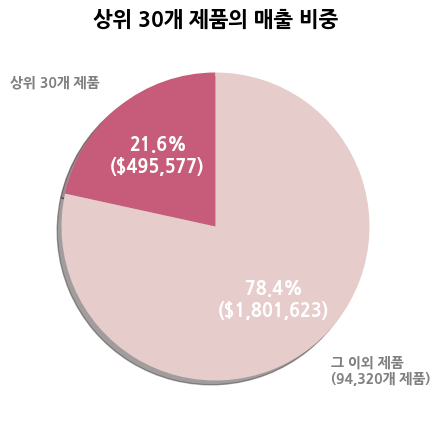

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Custom function to display percentage and count with thousands separator
def func(pct, allvals):
    absolute = int(pct / 100. * np.sum(allvals))
    return "{:.1f}%\n(${:,})".format(pct, absolute)  # Add thousands separator to the count

# Pie chart data
labels = ['상위 30개 제품', '그 이외 제품\n(94,320개 제품)']
sizes = [495577.6361, 1801623.2241999998]
explode = (0, 0)

# Define gradient gray colors (dark to light)
colors = ['#C75B7A', '#E7CCCC']

# Set the figure size to medium
plt.figure(figsize=(5, 5))  # Medium-sized figure

# Create the pie chart
patches, texts, autotexts = plt.pie(sizes,
                                    explode=explode,
                                    labels=labels,
                                    autopct=lambda pct: func(pct, sizes),
                                    shadow=True,
                                    startangle=90,
                                    colors=colors,
                                    labeldistance=1.2)

plt.title('상위 30개 제품의 매출 비중', fontsize=15, weight='bold')

# Style the label texts
for t in texts:
    t.set_fontsize(10)
    t.set_color('gray')
    t.set_weight('bold')

# Style the autotexts (percentage and count inside pie chart)
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(13)
    t.set_weight('bold')

plt.show()


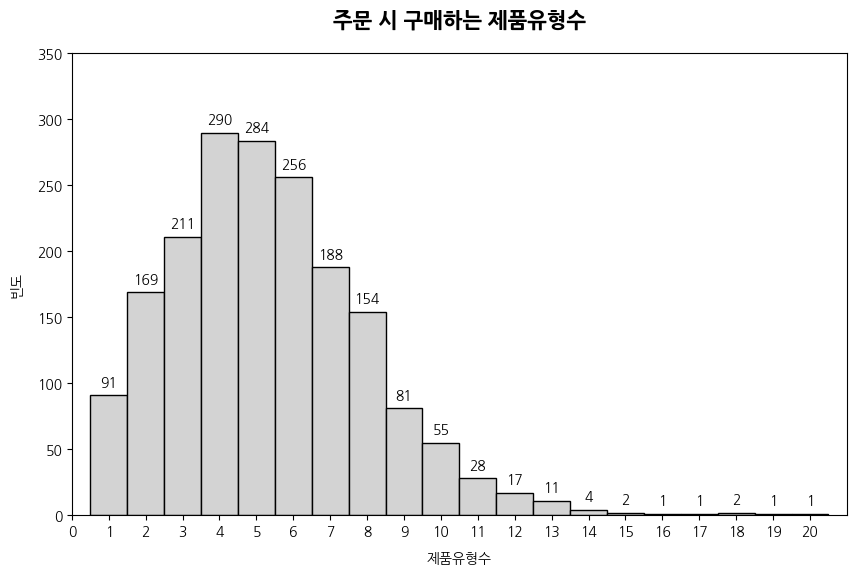

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(product_counts, bins=range(1, product_counts.max() + 2), edgecolor='black', color='lightgrey', align='left')

#plt.hist(order_counts, bins=range(1, order_counts.max() + 2), edgecolor='black', color='darkgray', align='left')
plt.title('주문 시 구매하는 제품유형수', weight='bold', pad=20, size=15)
plt.xlabel('제품유형수', labelpad = 10)
plt.ylabel('빈도', labelpad = 10)
#plt.grid(True)

plt.ylim(0, 350)
plt.xlim(0, 21)
plt.xticks(range(0, 21))  # x-axis ticks 설정

# 각 막대 위에 값 표시
for count, bin_edge in zip(counts, bins):
    if count > 0:  # 빈도수가 0인 막대에는 값 표시 안함
        plt.text(bin_edge, count + 5, f'{int(count):,}', ha='center', va='bottom', fontsize=10)


# Add thousands separator to the y-axis ticks
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))


# 그래프 보여주기
plt.show()


# 연관분석

In [ ]:
sales.iloc[:3]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [ ]:
# apriori 모델 적용을 위한 품목 리스트 가공
itemset = sales.drop_duplicates(
    ['Order ID', 'Sub-Category']).groupby(['Order ID'])['Sub-Category'].apply(list)

itemset = pd.DataFrame(itemset).reset_index().drop(['Order ID'], axis = 'columns')

itemset = itemset.squeeze()

itemset.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sub-Category
0,[Phones]
1,"[Tables, Binders]"
2,[Paper]
3,[Binders]
4,"[Fasteners, Paper]"


In [ ]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# apriori 모델 적용을 위한 장바구니 - 품목 더미 가공

encoder = TransactionEncoder()
encoder_T = encoder.fit(itemset).transform(itemset)

# 데이터프레임으로 변경
itemset_matrix = pd.DataFrame(encoder_T, columns=encoder.columns_)

itemset_matrix.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False


In [ ]:
# apriori() 함수를 사용하여 apriori 알고리즘의 연관규칙 모델을 적용
# min_support=0.1  옵션을 설정하여 지지도가 0.1 미만인 품목이나 품목 조합은 제거

itemset_apriori = apriori(itemset_matrix, min_support = 0.01, use_colnames=True)
itemset_apriori.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.143342,(Accessories)
1,0.090038,(Appliances)
2,0.145937,(Art)
3,0.262727,(Binders)
4,0.044720,(Bookcases)


In [ ]:
len(itemset_apriori) # 1,850개 물품 중에 구매횟수 100건 중 1건에 포함되어 있는 물품이 356개

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


68

In [ ]:
itemset_apriori.sort_values(by='support', ascending=False).iloc[:20]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
3,0.262727,(Binders)
12,0.237772,(Paper)
9,0.175085,(Furnishings)
13,0.162507,(Phones)
14,0.155121,(Storage)
2,0.145937,(Art)
0,0.143342,(Accessories)
5,0.114993,(Chairs)
1,0.090038,(Appliances)
10,0.069076,(Labels)


In [ ]:
# 향상도 1.1배 이상 상품 조합 추출
association_rules(itemset_apriori, metric="lift", min_threshold=1.1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Paper),(Fasteners),0.237772,0.042923,0.011779,0.049538,1.154125,0.001573,1.006960,0.175200
1,(Fasteners),(Paper),0.042923,0.237772,0.011779,0.274419,1.154125,0.001573,1.050507,0.139532
2,(Storage),(Labels),0.155121,0.069076,0.012178,0.078507,1.136537,0.001463,1.010235,0.142191
3,(Labels),(Storage),0.069076,0.155121,0.012178,0.176301,1.136537,0.001463,1.025713,0.129049
4,"(Paper, Phones)",(Binders),0.034937,0.262727,0.010781,0.308571,1.174494,0.001602,1.066304,0.153948
5,"(Paper, Binders)",(Phones),0.054901,0.162507,0.010781,0.196364,1.208336,0.001859,1.042129,0.182431
6,"(Binders, Phones)",(Paper),0.039728,0.237772,0.010781,0.271357,1.141248,0.001334,1.046092,0.128887
7,(Paper),"(Binders, Phones)",0.237772,0.039728,0.010781,0.045340,1.141248,0.001334,1.005878,0.162374
8,(Phones),"(Paper, Binders)",0.162507,0.054901,0.010781,0.066339,1.208336,0.001859,1.012251,0.205871
9,(Binders),"(Paper, Phones)",0.262727,0.034937,0.010781,0.041033,1.174494,0.001602,1.006357,0.201512


In [ ]:
# 향상도 1.1배 이상 상품 조합 추출
rules = association_rules(itemset_apriori, metric="lift", min_threshold=1.1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Paper),(Fasteners),0.237772,0.042923,0.011779,0.049538,1.154125,0.001573,1.006960,0.175200
1,(Fasteners),(Paper),0.042923,0.237772,0.011779,0.274419,1.154125,0.001573,1.050507,0.139532
2,(Storage),(Labels),0.155121,0.069076,0.012178,0.078507,1.136537,0.001463,1.010235,0.142191
3,(Labels),(Storage),0.069076,0.155121,0.012178,0.176301,1.136537,0.001463,1.025713,0.129049
4,"(Paper, Phones)",(Binders),0.034937,0.262727,0.010781,0.308571,1.174494,0.001602,1.066304,0.153948
5,"(Paper, Binders)",(Phones),0.054901,0.162507,0.010781,0.196364,1.208336,0.001859,1.042129,0.182431
6,"(Binders, Phones)",(Paper),0.039728,0.237772,0.010781,0.271357,1.141248,0.001334,1.046092,0.128887
7,(Paper),"(Binders, Phones)",0.237772,0.039728,0.010781,0.045340,1.141248,0.001334,1.005878,0.162374
8,(Phones),"(Paper, Binders)",0.162507,0.054901,0.010781,0.066339,1.208336,0.001859,1.012251,0.205871
9,(Binders),"(Paper, Phones)",0.262727,0.034937,0.010781,0.041033,1.174494,0.001602,1.006357,0.201512


In [ ]:
rules.pivot(index='antecedents', columns='consequents', values='lift')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


consequents,(Fasteners),(Paper),(Labels),(Storage),(Binders),(Phones),"(Binders, Phones)","(Paper, Binders)","(Paper, Phones)","(Storage, Binders)","(Paper, Storage)"
antecedents,,,,,,,,,,,
(Paper),1.154125,NaN,NaN,NaN,NaN,NaN,1.141248,NaN,NaN,1.120114,NaN
(Fasteners),NaN,1.154125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(Storage),NaN,NaN,1.136537,NaN,NaN,NaN,NaN,1.242434,NaN,NaN,NaN
(Labels),NaN,NaN,NaN,1.136537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Paper, Phones)",NaN,NaN,NaN,NaN,1.174494,NaN,NaN,NaN,NaN,NaN,NaN
"(Paper, Binders)",NaN,NaN,NaN,1.242434,NaN,1.208336,NaN,NaN,NaN,NaN,NaN
(Phones),NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.208336,NaN,NaN,NaN
(Binders),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.174494,NaN,1.133316
"(Binders, Phones)",NaN,1.141248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Assuming 'rules' is your DataFrame and the frozenset is in the index or column

# If the frozenset is in the index
rules.index = rules.index.map(lambda x: ', '.join(list(x)) if isinstance(x, frozenset) else x)

# If the frozenset is in the columns
rules.columns = rules.columns.map(lambda x: ', '.join(list(x)) if isinstance(x, frozenset) else x)

# If frozenset is within a specific column in your DataFrame
# Assuming the column name is 'antecedents'
rules['antecedents'] = rules['antecedents'].map(lambda x: ', '.join(list(x)) if isinstance(x, frozenset) else x)

rules['consequents'] = rules['consequents'].map(lambda x: ', '.join(list(x)) if isinstance(x, frozenset) else x)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-152-125a806d00a9>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot = pivot.applymap(lambda x: f'{x:.2f}' if x >= 1 else '')


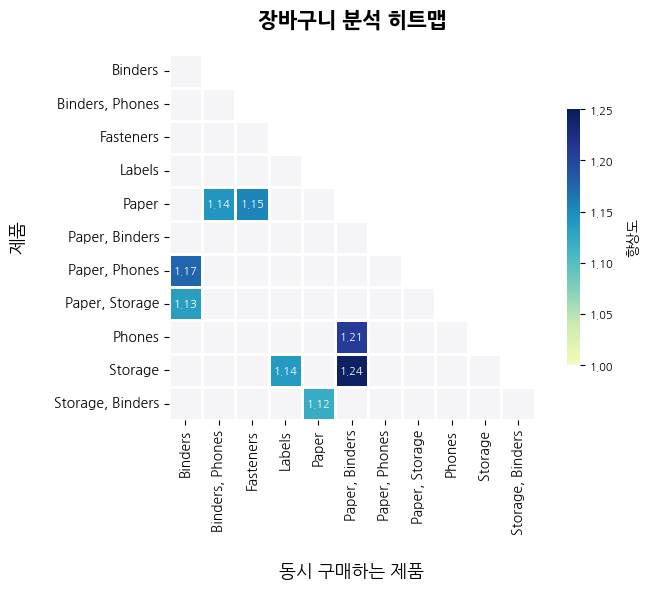

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Set up the figure size
plt.figure(figsize=(8, 6))

# Assuming 'rules' dataframe and 'pivot' are already created and NaN values are replaced by 0
pivot = rules.pivot(index='antecedents', columns='consequents', values='lift')


# Fill NaN with 0 (or any other value)
pivot = pivot.fillna(0)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(pivot, dtype=bool))

# Unmask the diagonal cells (0,0) to (11,11)
for i in range(min(len(pivot), 12)):  # This ensures we stay within bounds of the DataFrame
    mask[i, i] = False

# Custom colormap that includes light grey for 0 values
cmap = sns.color_palette("YlGnBu", as_cmap=True)
# Define a colormap that uses light grey for values below 1 (i.e., 0)
cmap = ListedColormap(['#F5F5F7'] + cmap(np.linspace(0.1, 1, 256)).tolist())


# Create a custom annotation: only show numbers >= 1, leave others blank
annot = pivot.applymap(lambda x: f'{x:.2f}' if x >= 1 else '')

# Plot the heatmap with custom annotation
heatmap = sns.heatmap(pivot, annot=annot, fmt="", cmap=cmap, mask=mask,
            cbar_kws={'label': '향상도', 'shrink':0.7}, square=True, vmin=1.0, vmax=1.25,
            linewidths=1,
            annot_kws={"size": 8})

# Customize the ticks and rotations
plt.yticks(rotation=0)
plt.xticks(rotation=90)

# Show the plot
#heatmap.collections[0].colorbar.ax.tick_params(labelsize=8)
cbar = heatmap.collections[0].colorbar
cbar.ax.yaxis.label.set_size(10)  # Set colorbar label font size
cbar.ax.tick_params(labelsize=8)  # Set colorbar tick label font size
cbar.ax.yaxis.labelpad = 10  # Add space between the colorbar and the label


# Show the plot

#plt.hist(order_counts, bins=range(1, order_counts.max() + 2), edgecolor='black', color='darkgray', align='left')
plt.title('장바구니 분석 히트맵', weight='bold', pad=20, size=15)
plt.xlabel('동시 구매하는 제품', labelpad = 20, size=13)
plt.ylabel('제품', labelpad = 20, size=13)
#plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Set up the figure size
plt.figure(figsize=(8, 6))

# Assuming 'rules' dataframe and 'pivot' are already created and NaN values are replaced by 0
pivot = rules.pivot(index='antecedents', columns='consequents', values='lift')

# Define the custom order you want for the rows (index)

custom_order = ['Binders', 'Fasteners', 'Labels', 'Paper', 'Phones', 'Storage',
                'Binders, Phones',
                'Binders, Paper', 'Binders, Storage',
                'Phones, Paper',
                'Paper, Storage', 'Paper, Binders'
                ]

# Reorder the index of the pivot table based on your custom order
pivot = pivot.reindex(custom_order)
pivot.columns = custom_order

# Fill NaN with 0 (or any other value)
pivot = pivot.fillna(0)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(pivot, dtype=bool))

# Unmask the diagonal cells (0,0) to (11,11)
#for i in range(min(len(pivot), 12)):  # This ensures we stay within bounds of the DataFrame
#    mask[i, i] = False

# Custom colormap that includes light grey for 0 values
cmap = sns.color_palette("YlGnBu", as_cmap=True)
# Define a colormap that uses light grey for values below 1 (i.e., 0)
cmap = ListedColormap(['#F5F5F7'] + cmap(np.linspace(0.1, 1, 256)).tolist())


# Create a custom annotation: only show numbers >= 1, leave others blank
annot = pivot.applymap(lambda x: f'{x:.2f}' if x >= 1 else '')

# Plot the heatmap with custom annotation
heatmap = sns.heatmap(pivot, annot=annot, fmt="", cmap=cmap, mask=mask,
            cbar_kws={'label': '향상도', 'shrink':0.7}, square=True, vmin=1.0, vmax=1.25,
            linewidths=1,
            annot_kws={"size": 8})

# Customize the ticks and rotations
plt.yticks(rotation=0)
plt.xticks(rotation=90)

# Show the plot
#heatmap.collections[0].colorbar.ax.tick_params(labelsize=8)
cbar = heatmap.collections[0].colorbar
cbar.ax.yaxis.label.set_size(10)  # Set colorbar label font size
cbar.ax.tick_params(labelsize=8)  # Set colorbar tick label font size
cbar.ax.yaxis.labelpad = 10  # Add space between the colorbar and the label


# Show the plot

#plt.hist(order_counts, bins=range(1, order_counts.max() + 2), edgecolor='black', color='darkgray', align='left')
plt.title('장바구니 분석 히트맵', weight='bold', pad=20, size=15)
plt.xlabel('동시 구매하는 제품', labelpad = 20, size=13)
plt.ylabel('제품', labelpad = 20, size=13)
#plt.grid(True)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: Length mismatch: Expected axis has 11 elements, new values have 12 elements

<Figure size 800x600 with 0 Axes>

In [ ]:
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,Paper,Fasteners,0.237772,0.042923,0.011779,0.049538,1.154125,0.001573,1.006960,0.175200
1,Fasteners,Paper,0.042923,0.237772,0.011779,0.274419,1.154125,0.001573,1.050507,0.139532
2,Storage,Labels,0.155121,0.069076,0.012178,0.078507,1.136537,0.001463,1.010235,0.142191
3,Labels,Storage,0.069076,0.155121,0.012178,0.176301,1.136537,0.001463,1.025713,0.129049
4,"Paper, Phones",Binders,0.034937,0.262727,0.010781,0.308571,1.174494,0.001602,1.066304,0.153948
5,"Paper, Binders",Phones,0.054901,0.162507,0.010781,0.196364,1.208336,0.001859,1.042129,0.182431
6,"Binders, Phones",Paper,0.039728,0.237772,0.010781,0.271357,1.141248,0.001334,1.046092,0.128887
7,Paper,"Binders, Phones",0.237772,0.039728,0.010781,0.045340,1.141248,0.001334,1.005878,0.162374
8,Phones,"Paper, Binders",0.162507,0.054901,0.010781,0.066339,1.208336,0.001859,1.012251,0.205871
9,Binders,"Paper, Phones",0.262727,0.034937,0.010781,0.041033,1.174494,0.001602,1.006357,0.201512


In [ ]:
pivot

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Binders,Fasteners,Labels,Paper,Phones,Storage,"Binders, Phones","Binders, Paper","Binders, Storage","Phones, Paper","Paper, Storage"
antecedents,,,,,,,,,,,
Binders,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.174494,1.133316,0.0,0.000000,0.000000
Fasteners,0.000000,0.000000,0.000000,0.000000,1.154125,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
Labels,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.136537,0.000000
Paper,0.000000,1.141248,1.154125,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.120114
Phones,0.000000,0.000000,0.000000,0.000000,0.000000,1.208336,0.000000,0.000000,0.0,0.000000,0.000000
Storage,0.000000,0.000000,0.000000,1.136537,0.000000,1.242434,0.000000,0.000000,0.0,0.000000,0.000000
"Binders, Phones",0.000000,0.000000,0.000000,0.000000,1.141248,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
"Binders, Paper",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
"Binders, Storage",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


In [ ]:
unit_price = sales[sales['Product Name'] == 'Bush Somerset Collection Bookcase']
unit_price

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.00,41.9136
5399,5400,CA-2016-117681,4/9/2016,4/14/2016,Standard Class,HF-14995,Herbert Flentye,Consumer,United States,Los Angeles,California,90004,West,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,556.665,5,0.15,6.5490
8634,8635,CA-2017-159793,8/25/2017,8/29/2017,Standard Class,SV-20365,Seth Vernon,Consumer,United States,Philadelphia,Pennsylvania,19140,East,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,130.980,2,0.50,-89.0664
9334,9335,CA-2017-110198,5/1/2017,5/2/2017,First Class,AG-10900,Arthur Gainer,Consumer,United States,Coral Springs,Florida,33065,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,314.352,3,0.20,-15.7176


In [ ]:
unit_price['Sales']/unit_price['Quantity']/(1-unit_price['Discount'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
0,130.98
5399,130.98
8634,130.98
9334,130.98


In [ ]:
sales['unit_price'] = sales['Sales']/sales['Quantity']/(1-sales['Discount'])

In [ ]:
sales.head(2)['Product Name'].tolist()

['Bush Somerset Collection Bookcase',
 'Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back']

In [ ]:
sales[sales['Product Name'] == 'Bush Somerset Collection Bookcase']

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,unit_price
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.00,41.9136,130.98
5399,5400,CA-2016-117681,4/9/2016,4/14/2016,Standard Class,HF-14995,Herbert Flentye,Consumer,United States,Los Angeles,California,90004,West,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,556.665,5,0.15,6.5490,130.98
8634,8635,CA-2017-159793,8/25/2017,8/29/2017,Standard Class,SV-20365,Seth Vernon,Consumer,United States,Philadelphia,Pennsylvania,19140,East,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,130.980,2,0.50,-89.0664,130.98
9334,9335,CA-2017-110198,5/1/2017,5/2/2017,First Class,AG-10900,Arthur Gainer,Consumer,United States,Coral Springs,Florida,33065,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,314.352,3,0.20,-15.7176,130.98


In [ ]:
sales['unit_price'] = sales['unit_price'].round(2)

In [ ]:
# Group by 'Product Name' and apply to extract unique 'unit_price' values
unique_unit_prices = sales.groupby('Product Name')['unit_price'].apply(lambda x: len(x.unique()))
unique_unit_prices[unique_unit_prices != 1]

,unit_price
Product Name,
Easy-staple paper,8
Eldon Wave Desk Accessories,2
Staple envelope,8
Staple holder,3
Staple magnet,2
Staple remover,3
Staple-based wall hangings,2
Staples,10
Staples in misc. colors,7


In [ ]:
unique_unit_prices[unique_unit_prices != 1].index

Index(['Easy-staple paper', 'Eldon Wave Desk Accessories', 'Staple envelope',
       'Staple holder', 'Staple magnet', 'Staple remover',
       'Staple-based wall hangings', 'Staples', 'Staples in misc. colors'],
      dtype='object', name='Product Name')

In [ ]:
sales[sales['Product Name'] == 'Bush Somerset Collection Bookcase']

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,unit_price
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.00,41.9136,130.98
5399,5400,CA-2016-117681,4/9/2016,4/14/2016,Standard Class,HF-14995,Herbert Flentye,Consumer,United States,Los Angeles,California,90004,West,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,556.665,5,0.15,6.5490,130.98
8634,8635,CA-2017-159793,8/25/2017,8/29/2017,Standard Class,SV-20365,Seth Vernon,Consumer,United States,Philadelphia,Pennsylvania,19140,East,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,130.980,2,0.50,-89.0664,130.98
9334,9335,CA-2017-110198,5/1/2017,5/2/2017,First Class,AG-10900,Arthur Gainer,Consumer,United States,Coral Springs,Florida,33065,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,314.352,3,0.20,-15.7176,130.98


In [ ]:
#sample = sales[sales['Product Name'] == 'Bush Somerset Collection Bookcase'] #Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back
sample = sales[sales['Product Name'] == 'Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back']
sample.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,unit_price
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.582,243.98
149,150,CA-2016-114489,12/5/2016,12/9/2016,Standard Class,JE-16165,Justin Ellison,Corporate,United States,Franklin,Wisconsin,53132,Central,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",1951.84,8,0.0,585.552,243.98
4022,4023,CA-2014-154963,6/22/2014,6/27/2014,Standard Class,AA-10645,Anna Andreadi,Consumer,United States,Chester,Pennsylvania,19013,East,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",853.93,5,0.3,0.000,243.98


In [ ]:
sales.drop(['unit_price'], axis=1, inplace=True)

In [ ]:
sales.iloc[:3]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [ ]:
sample = sales.copy()

In [ ]:
sample['unit_profit'] = (sample['Sales']-sample['Profit'])/sample['Sales'] # 단가 별 수익률

In [ ]:
sample.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,unit_profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,0.84
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,0.70
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,0.53


In [ ]:
sample_v2 = sample[sample['Profit'] != 0].copy()

In [ ]:
sample_v2.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,unit_profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,0.84
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,0.70
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,0.53


In [ ]:
sample_v2['Profit/Sales'] = sample_v2['Profit']/sample_v2['Sales'] * 100

In [ ]:
sample_v2.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,unit_profit,Profit/Sales,Elapsed Days
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,0.84,16.0,3 days
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,0.70,30.0,3 days
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,0.53,47.0,4 days


In [ ]:
bar_df = sample_v2.groupby(['Ship Mode']).agg({'Profit/Sales':'mean', 'Discount':'mean'})
bar_df

,Profit/Sales,Discount
Ship Mode,,
First Class,11.670663,0.164705
Same Day,13.840624,0.152306
Second Class,15.082916,0.139107
Standard Class,11.092830,0.160270


In [ ]:
bar_df.index

Index(['First Class', 'Same Day', 'Second Class', 'Standard Class'], dtype='object', name='Ship Mode')

In [ ]:
bar_df = bar_df.reindex(['Same Day', 'First Class', 'Second Class', 'Standard Class'])

In [ ]:
bar_df.index

Index(['Same Day', 'First Class', 'Second Class', 'Standard Class'], dtype='object', name='Ship Mode')

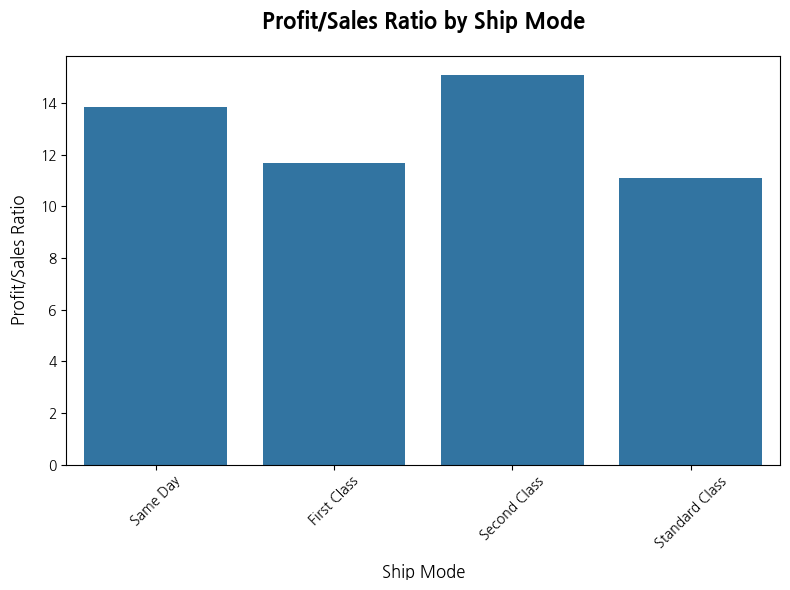

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the 'Profit/Sales' ratio data for each 'Ship Mode' in a DataFrame called 'profit_sales_ratio'
# Example data:
data = {
    'Ship Mode': bar_df.index.tolist(),
    'Profit/Sales': bar_df['Profit/Sales'].tolist()
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set up the figure size
plt.figure(figsize=(8, 6))

# Create a barplot
sns.barplot(x='Ship Mode', y='Profit/Sales', data=df)

# Customize the plot
plt.title('Profit/Sales Ratio by Ship Mode', fontsize=16, weight='bold', pad=20)
plt.xlabel('Ship Mode', fontsize=12, labelpad=10)
plt.ylabel('Profit/Sales Ratio', fontsize=12, labelpad=10)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()


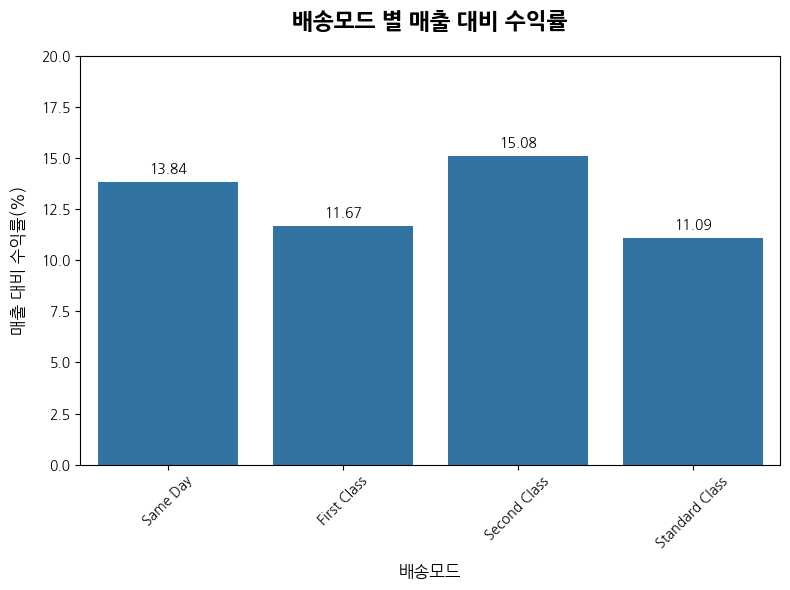

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the 'Profit/Sales' ratio data for each 'Ship Mode' in a DataFrame called 'profit_sales_ratio'
# Example data:
data = {
    'Ship Mode': bar_df.index.tolist(),
    'Profit/Sales': bar_df['Profit/Sales'].round(2).tolist()
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set up the figure size
plt.figure(figsize=(8, 6))

# Create a barplot
ax = sns.barplot(x='Ship Mode', y='Profit/Sales', data=df)

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),  # Format the number with 3 decimal places
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Coordinates to place the label
                ha = 'center', va = 'center',  # Align horizontally and vertically
                xytext=(0, 9), textcoords='offset points')  # Offset to avoid overlap with the bar

# Customize the plot
plt.title('배송모드 별 매출 대비 수익률', fontsize=16, weight='bold', pad=20)
plt.xlabel('배송모드', fontsize=12, labelpad=10)
plt.ylabel('매출 대비 수익률(%)', fontsize=12, labelpad=10)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.ylim(0, 20)

# Show the plot
plt.tight_layout()
plt.show()


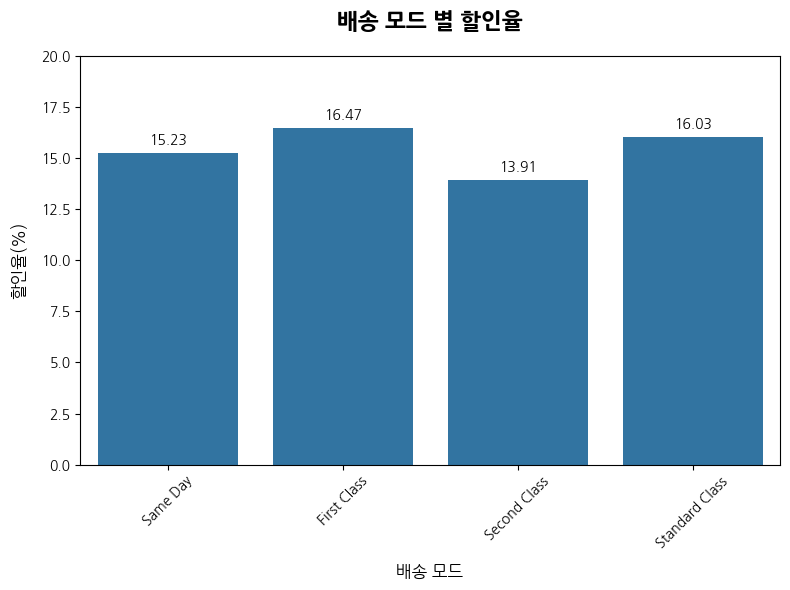

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the 'Profit/Sales' ratio data for each 'Ship Mode' in a DataFrame called 'profit_sales_ratio'
# Example data:
data = {
    'Ship Mode': bar_df.index.tolist(),
    'Profit/Sales': bar_df['Profit/Sales'].tolist(),
    'Discount': (bar_df['Discount'] * 100).tolist()
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set up the figure size
plt.figure(figsize=(8, 6))

# Create a barplot
ax = sns.barplot(x='Ship Mode', y='Discount', data=df)

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),  # Format the number with 3 decimal places
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Coordinates to place the label
                ha = 'center', va = 'center',  # Align horizontally and vertically
                xytext=(0, 9), textcoords='offset points')  # Offset to avoid overlap with the bar


# Customize the plot
plt.title('배송 모드 별 할인율', fontsize=16, weight='bold', pad=20)
plt.xlabel('배송 모드', fontsize=12, labelpad=10)
plt.ylabel('할인율(%)', fontsize=12, labelpad=10)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylim(0, 20)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
sales.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [ ]:
sample_v2['Order Date'] = pd.to_datetime(sample_v2['Order Date'])
sample_v2['Ship Date'] = pd.to_datetime(sample_v2['Ship Date'])

In [ ]:
sample_v2.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,unit_profit,Profit/Sales
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,0.84,0.16
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,0.70,0.30
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,0.53,0.47


In [ ]:
sample_v2['Elapsed Days'] = sample_v2['Ship Date'] - sample_v2['Order Date']

In [ ]:
sample_v2.groupby(['Ship Mode']).agg({'Elapsed Days':'mean'}).sort_values(by='Elapsed Days', ascending=False)

,Elapsed Days
Ship Mode,
Standard Class,5 days 00:10:27.355623100
Second Class,3 days 05:46:25.957666494
First Class,2 days 04:26:42.094240837
Same Day,0 days 01:03:45.830258302


In [ ]:
(sample['Sales']- sample['Profit'])/sample['Quantity']

,0
1,170.786
149,170.786
4022,170.786
4734,170.786
4850,170.786
4880,170.786
5141,170.786
5468,170.786
6113,170.786
7389,170.786


In [ ]:
(sample['Sales']- sample['Profit'])/sample['Quantity']

In [ ]:
sample_v2.iloc[:3]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,unit_profit,Profit/Sales,Elapsed Days
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,0.84,16.0,3 days
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,0.70,30.0,3 days
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,0.53,47.0,4 days


In [ ]:
sample_v2['unit_price'] = sample_v2['Sales']/sample_v2['Quantity']/(1-sample_v2['Discount'])

In [ ]:
sample_v2[sample_v2['Product Name'] == 'Bush Somerset Collection Bookcase']

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,unit_profit,Profit/Sales,Elapsed Days,unit_price
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.00,41.9136,0.840000,16.000000,3 days,130.98
5399,5400,CA-2016-117681,2016-04-09,2016-04-14,Standard Class,HF-14995,Herbert Flentye,Consumer,United States,Los Angeles,California,90004,West,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,556.665,5,0.15,6.5490,0.988235,1.176471,5 days,130.98
8634,8635,CA-2017-159793,2017-08-25,2017-08-29,Standard Class,SV-20365,Seth Vernon,Consumer,United States,Philadelphia,Pennsylvania,19140,East,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,130.980,2,0.50,-89.0664,1.680000,-68.000000,4 days,130.98
9334,9335,CA-2017-110198,2017-05-01,2017-05-02,First Class,AG-10900,Arthur Gainer,Consumer,United States,Coral Springs,Florida,33065,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,314.352,3,0.20,-15.7176,1.050000,-5.000000,1 days,130.98


In [ ]:
b = sample_v2[sample_v2['Product Name'] == 'Bush Somerset Collection Bookcase'].copy()

In [ ]:
b['check'] = b['unit_price'] * b['Quantity'] * (1-b['Discount'])

In [ ]:
b

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,unit_profit,Profit/Sales,Elapsed Days,unit_price,check
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.00,41.9136,0.840000,16.000000,3 days,130.98,261.960
5399,5400,CA-2016-117681,2016-04-09,2016-04-14,Standard Class,HF-14995,Herbert Flentye,Consumer,United States,Los Angeles,California,90004,West,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,556.665,5,0.15,6.5490,0.988235,1.176471,5 days,130.98,556.665
8634,8635,CA-2017-159793,2017-08-25,2017-08-29,Standard Class,SV-20365,Seth Vernon,Consumer,United States,Philadelphia,Pennsylvania,19140,East,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,130.980,2,0.50,-89.0664,1.680000,-68.000000,4 days,130.98,130.980
9334,9335,CA-2017-110198,2017-05-01,2017-05-02,First Class,AG-10900,Arthur Gainer,Consumer,United States,Coral Springs,Florida,33065,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,314.352,3,0.20,-15.7176,1.050000,-5.000000,1 days,130.98,314.352


In [ ]:
sample_v2.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,unit_profit,Profit/Sales,Elapsed Days,unit_price
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,0.8400,16.00,3 days,130.98
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,0.7000,30.00,3 days,243.98
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,0.5300,47.00,4 days,7.31
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,1.4000,-40.00,7 days,348.21
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,0.8875,11.25,7 days,13.98


In [ ]:
sample_v2[sample_v2['Order ID'] == 'CA-2016-152156']

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,unit_profit,Profit/Sales,Elapsed Days,unit_price
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,0.84,16.0,3 days,130.98
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,0.70,30.0,3 days,243.98


In [ ]:
sample_v2[sample_v2['Order ID'] == 'US-2015-108966']

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,unit_profit,Profit/Sales,Elapsed Days,unit_price
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,1.4000,-40.00,7 days,348.21
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,0.8875,11.25,7 days,13.98


In [ ]:
c = sample_v2.groupby(['Order ID', 'Ship Mode']).agg({'Profit':'sum', 'Sales':'sum'})

In [ ]:
c

,,Profit,Sales
Order ID,Ship Mode,,
CA-2014-100006,Standard Class,109.6113,377.970
CA-2014-100090,Standard Class,-19.0890,699.192
CA-2014-100293,Standard Class,31.8696,91.056
CA-2014-100328,Standard Class,1.3257,3.928
CA-2014-100363,Standard Class,7.7192,21.376
...,...,...,...
US-2017-168802,Standard Class,5.9696,18.368
US-2017-169320,Second Class,16.6721,171.430
US-2017-169488,First Class,26.5552,56.860


In [ ]:
c['Profit/Sales'] = c['Profit']/c['Sales'] * 100
c

,,Profit,Sales,Profit/Sales
Order ID,Ship Mode,,,
CA-2014-100006,Standard Class,109.6113,377.970,29.000000
CA-2014-100090,Standard Class,-19.0890,699.192,-2.730151
CA-2014-100293,Standard Class,31.8696,91.056,35.000000
CA-2014-100328,Standard Class,1.3257,3.928,33.750000
CA-2014-100363,Standard Class,7.7192,21.376,36.111527
...,...,...,...,...
US-2017-168802,Standard Class,5.9696,18.368,32.500000
US-2017-169320,Second Class,16.6721,171.430,9.725311
US-2017-169488,First Class,26.5552,56.860,46.702779


In [ ]:
c.groupby(['Ship Mode']).agg({'Profit/Sales':['median', 'mean']})

Profit/Sales           
                     median       mean
Ship Mode                             
First Class       24.000000  10.957238
Same Day          21.948500  10.527752
Second Class      22.650570  12.641445
Standard Class    24.469469  11.251075

In [ ]:
d = c.groupby(['Ship Mode']).agg({'Profit/Sales':['median', 'mean']})
d.index

Index(['First Class', 'Same Day', 'Second Class', 'Standard Class'], dtype='object', name='Ship Mode')

In [ ]:
d = d.reindex(['Same Day', 'First Class', 'Second Class', 'Standard Class'])
d.round(2)

Profit/Sales       
                     median   mean
Ship Mode                         
Same Day              21.95  10.53
First Class           24.00  10.96
Second Class          22.65  12.64
Standard Class        24.47  11.25

In [ ]:
d.index.tolist()

['Same Day', 'First Class', 'Second Class', 'Standard Class']

In [ ]:
d['Profit/Sales']['median'].tolist()

[21.948499935919912, 24.0, 22.65057027955853, 24.469469336382407]

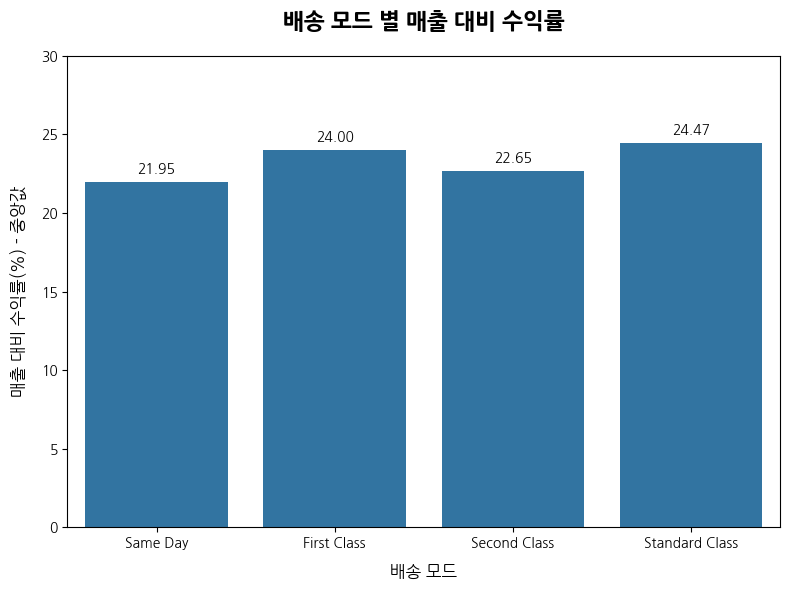

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the 'Profit/Sales' ratio data for each 'Ship Mode' in a DataFrame called 'profit_sales_ratio'
# Example data:
data = {
    'Ship Mode': ['Same Day', 'First Class', 'Second Class', 'Standard Class'],
    'Profit/Sales': [21.948499935919912, 24.0, 22.65057027955853, 24.469469336382407],
    #'Discount': (bar_df['Discount'] * 100).tolist()
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set up the figure size
plt.figure(figsize=(8, 6))

# Create a barplot
ax = sns.barplot(x='Ship Mode', y='Profit/Sales', data=df)

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),  # Format the number with 3 decimal places
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Coordinates to place the label
                ha = 'center', va = 'center',  # Align horizontally and vertically
                xytext=(0, 9), textcoords='offset points')  # Offset to avoid overlap with the bar


# Customize the plot
plt.title('배송 모드 별 매출 대비 수익률', fontsize=16, weight='bold', pad=20)
plt.xlabel('배송 모드', fontsize=12, labelpad=10)
plt.ylabel('매출 대비 수익률(%) - 중앙값', fontsize=12, labelpad=10)
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.ylim(0, 30)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
sample_v3 = sales.copy()
sample_v3.iloc[:3]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [ ]:
sample_v3['Profit/Sales'] = (sample_v3['Profit']/sample_v3['Sales']) * 100

In [ ]:
sample_v3.groupby(['Category']).agg({'Profit/Sales':['mean', 'median']}) # Technology > Office Supplies > Furniture

Profit/Sales           
                        mean     median
Category                               
Furniture           3.878353  11.111111
Office Supplies    13.803029  32.500000
Technology         15.613805  18.000000

In [ ]:
sample_v3.groupby(['Ship Mode', 'Category']).agg({'Profit/Sales':'mean'}).unstack()

Profit/Sales                           
Category          Furniture Office Supplies Technology
Ship Mode                                             
First Class        3.625101       13.404029  14.783051
Same Day           3.594997       17.344410  14.485058
Second Class       3.095743       18.864800  16.834634
Standard Class     4.239497       11.982645  15.534185

In [ ]:
sample_v4 = sample_v3.groupby(['Ship Mode', 'Category']).agg({'Profit/Sales':'count'}).unstack()

In [ ]:
sample_v4

Profit/Sales                           
Category          Furniture Office Supplies Technology
Ship Mode                                             
First Class             327             910        301
Same Day                119             326         98
Second Class            427            1152        366
Standard Class         1248            3638       1082

In [ ]:
sample_v4['Profit/Sales'][['Furniture', 'Office Supplies', 'Technology']].div(sample_v4['Profit/Sales'][['Furniture', 'Office Supplies','Technology']].sum()) * 100

Category,Furniture,Office Supplies,Technology
Ship Mode,,,
First Class,15.417256,15.101228,16.296697
Same Day,5.610561,5.409890,5.305901
Second Class,20.132013,19.117159,19.815918
Standard Class,58.840170,60.371723,58.581483


In [ ]:
sample_v4['Profit/Sales'][['Furniture', 'Office Supplies', 'Technology']].div(sample_v4['Profit/Sales'][['Furniture', 'Office Supplies','Technology']].sum(axis=1), axis=0) * 100

Category,Furniture,Office Supplies,Technology
Ship Mode,,,
First Class,21.261378,59.167750,19.570871
Same Day,21.915285,60.036832,18.047882
Second Class,21.953728,59.228792,18.817481
Standard Class,20.911528,60.958445,18.130027


In [ ]:
sample_v4 = sample_v3.groupby(['Ship Mode', 'Category']).agg({'Sales':'count'}).unstack()

In [ ]:
sample_v4['Sales'][['Furniture', 'Office Supplies', 'Technology']].div(sample_v4['Sales'][['Furniture', 'Office Supplies','Technology']].sum(axis=1), axis=0) * 100

Category,Furniture,Office Supplies,Technology
Ship Mode,,,
First Class,21.261378,59.167750,19.570871
Same Day,21.915285,60.036832,18.047882
Second Class,21.953728,59.228792,18.817481
Standard Class,20.911528,60.958445,18.130027


In [ ]:
sample_v4 = sample_v3.groupby(['Ship Mode', 'Category']).agg({'Profit':'count'}).unstack()
sample_v4['Profit'][['Furniture', 'Office Supplies', 'Technology']].div(sample_v4['Profit'][['Furniture', 'Office Supplies','Technology']].sum(axis=1), axis=0) * 100

Category,Furniture,Office Supplies,Technology
Ship Mode,,,
First Class,21.261378,59.167750,19.570871
Same Day,21.915285,60.036832,18.047882
Second Class,21.953728,59.228792,18.817481
Standard Class,20.911528,60.958445,18.130027


In [ ]:
df = pd.DataFrame(sample_v4)
df.set_index('Category', inplace=True)

# Calculate the proporton for each category (Furniture, Office Supplies, Technology)
df_proportion = df.div(df.sum())

print(df_proportion)


KeyError: "None of ['Category'] are in the columns"

In [ ]:
sample_v4['Profit/Sales']['Furniture']

In [ ]:
sample_v4 = sample_v3.groupby(['Order ID', 'Ship Mode']).agg({'Profit':'median', 'Sales':'median'})
sample_v4

In [ ]:
sample_v3.groupby(['Order ID', 'Ship Mode', 'Category']).agg({'Profit/Sales':['count', 'mean', 'median']})

Profit/Sales                  
                                                     count       mean median
Order ID       Ship Mode      Category                                      
CA-2014-100006 Standard Class Technology                 1  29.000000  29.00
CA-2014-100090 Standard Class Furniture                  1 -17.500000 -17.50
                              Office Supplies            1  35.000000  35.00
CA-2014-100293 Standard Class Office Supplies            1  35.000000  35.00
CA-2014-100328 Standard Class Office Supplies            1  33.750000  33.75
...                                                    ...        ...    ...
US-2017-169488 First Class    Office Supplies            2  46.500000  46.50
US-2017-169502 Standard Class Office Supplies            2  28.000000  28.00
US-2017-169551 First Class    Furniture                  1 -52.000000 -52.00
                              Office Supplies            2  21.250000  21.25
                              Technology                 3   9.444444  16.25

[7050 rows x 3 columns]

In [ ]:
sample_v3.groupby(['Order ID', 'Ship Mode', 'Category']).agg({'Category':'count'})

Category
Order ID       Ship Mode      Category                 
CA-2014-100006 Standard Class Technology              1
CA-2014-100090 Standard Class Furniture               1
                              Office Supplies         1
CA-2014-100293 Standard Class Office Supplies         1
CA-2014-100328 Standard Class Office Supplies         1
...                                                 ...
US-2017-169488 First Class    Office Supplies         2
US-2017-169502 Standard Class Office Supplies         2
US-2017-169551 First Class    Furniture               1
                              Office Supplies         2
                              Technology              3

[7050 rows x 1 columns]

In [ ]:
sample_v3.groupby(['Order ID', 'Ship Mode', 'Category']).agg({'Category':'count'}).unstack()

Category                           
Category                      Furniture Office Supplies Technology
Order ID       Ship Mode                                          
CA-2014-100006 Standard Class       NaN             NaN        1.0
CA-2014-100090 Standard Class       1.0             1.0        NaN
CA-2014-100293 Standard Class       NaN             1.0        NaN
CA-2014-100328 Standard Class       NaN             1.0        NaN
CA-2014-100363 Standard Class       NaN             2.0        NaN
...                                 ...             ...        ...
US-2017-168802 Standard Class       NaN             1.0        NaN
US-2017-169320 Second Class         NaN             1.0        1.0
US-2017-169488 First Class          NaN             2.0        NaN
US-2017-169502 Standard Class       NaN             2.0        NaN
US-2017-169551 First Class          1.0             2.0        3.0

[5009 rows x 3 columns]

In [ ]:
sample_v10 = sample_v3.groupby(['Order ID', 'Ship Mode', 'Category']).agg({'Category':'count'}).unstack()
sample_v10

Category                           
Category                      Furniture Office Supplies Technology
Order ID       Ship Mode                                          
CA-2014-100006 Standard Class       NaN             NaN        1.0
CA-2014-100090 Standard Class       1.0             1.0        NaN
CA-2014-100293 Standard Class       NaN             1.0        NaN
CA-2014-100328 Standard Class       NaN             1.0        NaN
CA-2014-100363 Standard Class       NaN             2.0        NaN
...                                 ...             ...        ...
US-2017-168802 Standard Class       NaN             1.0        NaN
US-2017-169320 Second Class         NaN             1.0        1.0
US-2017-169488 First Class          NaN             2.0        NaN
US-2017-169502 Standard Class       NaN             2.0        NaN
US-2017-169551 First Class          1.0             2.0        3.0

[5009 rows x 3 columns]

In [ ]:
# Flatten MultiIndex columns
sample_v10.columns = sample_v10.columns.get_level_values(1)
sample_v10

,Category,Furniture,Office Supplies,Technology
Order ID,Ship Mode,,,
CA-2014-100006,Standard Class,NaN,NaN,1.0
CA-2014-100090,Standard Class,1.0,1.0,NaN
CA-2014-100293,Standard Class,NaN,1.0,NaN
CA-2014-100328,Standard Class,NaN,1.0,NaN
CA-2014-100363,Standard Class,NaN,2.0,NaN
...,...,...,...,...
US-2017-168802,Standard Class,NaN,1.0,NaN
US-2017-169320,Second Class,NaN,1.0,1.0
US-2017-169488,First Class,NaN,2.0,NaN


In [ ]:
sample_v10['total_count'] = sample_v10.sum(axis=1)
sample_v10

,Category,Furniture,Office Supplies,Technology,total_count
Order ID,Ship Mode,,,,
CA-2014-100006,Standard Class,NaN,NaN,1.0,1.0
CA-2014-100090,Standard Class,1.0,1.0,NaN,2.0
CA-2014-100293,Standard Class,NaN,1.0,NaN,1.0
CA-2014-100328,Standard Class,NaN,1.0,NaN,1.0
CA-2014-100363,Standard Class,NaN,2.0,NaN,2.0
...,...,...,...,...,...
US-2017-168802,Standard Class,NaN,1.0,NaN,1.0
US-2017-169320,Second Class,NaN,1.0,1.0,2.0
US-2017-169488,First Class,NaN,2.0,NaN,2.0


In [ ]:
sample_v10.groupby(['Ship Mode']).agg({'total_count':'mean'})

Category,total_count
Ship Mode,
First Class,1.954257
Same Day,2.056818
Second Class,2.017635
Standard Class,1.993320


In [ ]:
sample_v3[sample_v3['Order ID'] == 'US-2017-169488']

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit/Sales
9538,9539,US-2017-169488,9/7/2017,9/9/2017,First Class,AA-10375,Allen Armold,Consumer,United States,Providence,Rhode Island,2908,East,OFF-PA-10002659,Office Supplies,Paper,Avoid Verbal Orders Carbonless Minifold Book,16.90,5,0.0,7.7740,46.0
9539,9540,US-2017-169488,9/7/2017,9/9/2017,First Class,AA-10375,Allen Armold,Consumer,United States,Providence,Rhode Island,2908,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,39.96,2,0.0,18.7812,47.0


# Segment 별로 주문하는 제품 구성이 어떻게 되는지

In [ ]:
sample = sales.copy()

In [ ]:
sample_v1 = sample.groupby(['Order ID', 'Segment', 'Category']).agg({'Category':'count'}).unstack()
# Flatten MultiIndex columns
sample_v1.columns = sample_v1.columns.get_level_values(1)
sample_v1.head(3)

,Category,Furniture,Office Supplies,Technology
Order ID,Segment,,,
CA-2014-100006,Consumer,NaN,NaN,1.0
CA-2014-100090,Corporate,1.0,1.0,NaN
CA-2014-100293,Home Office,NaN,1.0,NaN


In [ ]:
sample_v1 = sample_v1.fillna(0)

In [ ]:
sample_v1 = sample_v1[['Furniture', 'Office Supplies', 'Technology']].div(sample_v1[['Furniture', 'Office Supplies', 'Technology']].sum(axis=1), axis=0)*100

In [ ]:
sample_v1.head(3)

,Category,Furniture,Office Supplies,Technology
Order ID,Segment,,,
CA-2014-100006,Consumer,0.0,0.0,100.0
CA-2014-100090,Corporate,50.0,50.0,0.0
CA-2014-100293,Home Office,0.0,100.0,0.0


In [ ]:
sample_v1.groupby(['Segment'])[['Furniture', 'Office Supplies', 'Technology']].agg('mean')

Category,Furniture,Office Supplies,Technology
Segment,,,
Consumer,21.778183,59.865849,18.355969
Corporate,21.971205,60.571072,17.457723
Home Office,21.289363,61.011256,17.699381


In [ ]:
sample_v1.groupby(['Segment'])[['Furniture', 'Office Supplies', 'Technology']].agg('median')

Category,Furniture,Office Supplies,Technology
Segment,,,
Consumer,0.0,66.666667,0.0
Corporate,0.0,66.666667,0.0
Home Office,0.0,66.666667,0.0


In [ ]:
sample_v1.groupby(['Segment'])[['Furniture', 'Office Supplies', 'Technology']].agg('mean').index

Index(['Consumer', 'Corporate', 'Home Office'], dtype='object', name='Segment')

In [ ]:
sample_v1.groupby(['Segment'])[['Furniture', 'Office Supplies', 'Technology']].agg('mean').columns

Index(['Furniture', 'Office Supplies', 'Technology'], dtype='object', name='Category')

In [ ]:
sample_v1.groupby(['Segment'])[['Furniture', 'Office Supplies', 'Technology']].agg('mean').iloc[0].tolist()

[21.7781826105492, 59.86584857524533, 18.35596881420547]

In [ ]:
sample_v1.groupby(['Segment'])[['Furniture', 'Office Supplies', 'Technology']].agg('mean').iloc[1].tolist()

[21.97120525885387, 60.57107211004173, 17.457722631104403]

In [ ]:
sample_v1.groupby(['Segment'])[['Furniture', 'Office Supplies', 'Technology']].agg('mean').iloc[2].tolist()

[21.289363063290455, 61.01125588749351, 17.699381049216033]

In [ ]:
ax.texts

<Axes.ArtistList of 6 texts>

In [ ]:
texts

[Text(-0.7584469923981189, 0.9299237386593847, 'Furniture'),
 Text(0.12876608844351772, -1.1930713702318718, 'Office Supplies'),
 Text(0.6542822446508345, 1.0059397319594576, 'Technology')]

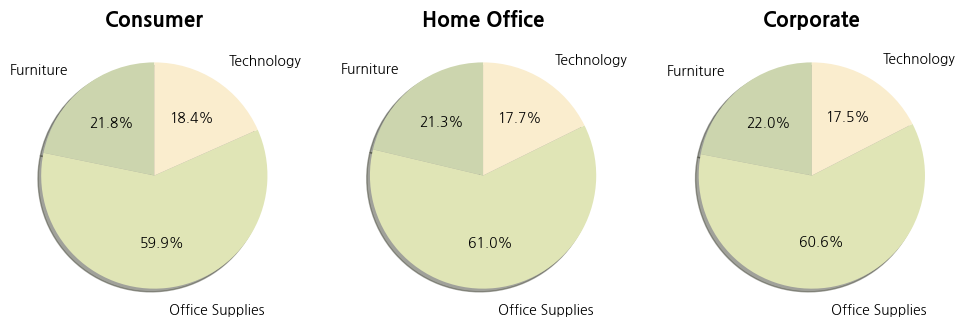

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Custom function to display percentage and count with thousands separator
def func(pct, allvals):
    absolute = int(pct / 100. * np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)  # Add thousands separator to the count

# Pie chart data for each segment
labels = ['Furniture', 'Office Supplies', 'Technology']
consumer_sizes = [21.7781826105492, 59.86584857524533, 18.35596881420547]
home_office_sizes = [21.289363063290455, 61.01125588749351, 17.699381049216033]
corporate_sizes = [21.97120525885387, 60.57107211004173, 17.457722631104403]
explode = (0, 0, 0)  # No explode effect

# Define gradient colors for each segment
colors = ['#CCD5AE', '#E0E5B6', '#FAEDCE']

# Set the figure size for three pie charts
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

# Plot pie chart for Consumer segment
axes[0].pie(consumer_sizes,
            explode=explode,
            labels=labels,
            autopct=lambda pct: func(pct, consumer_sizes),
            shadow=True,
            startangle=90,
            colors=colors,
            labeldistance=1.2)
axes[0].set_title('Consumer', fontsize=15, weight='bold')

# Plot pie chart for Home Office segment
axes[1].pie(home_office_sizes,
            explode=explode,
            labels=labels,
            autopct=lambda pct: func(pct, home_office_sizes),
            shadow=True,
            startangle=90,
            colors=colors,
            labeldistance=1.2)
axes[1].set_title('Home Office', fontsize=15, weight='bold')

# Plot pie chart for Corporate segment
axes[2].pie(corporate_sizes,
            explode=explode,
            labels=labels,
            autopct=lambda pct: func(pct, corporate_sizes),
            shadow=True,
            startangle=90,
            colors=colors,
            labeldistance=1.2)
axes[2].set_title('Corporate', fontsize=15, weight='bold')

# Style the label texts
for t in texts:
    t.set_fontsize(10)
    t.set_color('gray')
    t.set_weight('bold')

# Style the autotexts (percentage and count inside pie chart)
for t in autotexts:
    t.set_color("black")
    t.set_fontsize(13)
    #t.set_weight('bold')

# Show the chart
plt.tight_layout()
plt.show()
